In [ ]:
#Here we import everything from los_simulation 
from los_simulation import *

In [4]:
# define a receiver node with a specified location, direction and antenna pattern
# Here we start at the origin and point in the y direction, with a simple directional pattern
rx = RxNode(location=[0,0],direction=[0,1],antenna_pattern=simple_directional_gain)

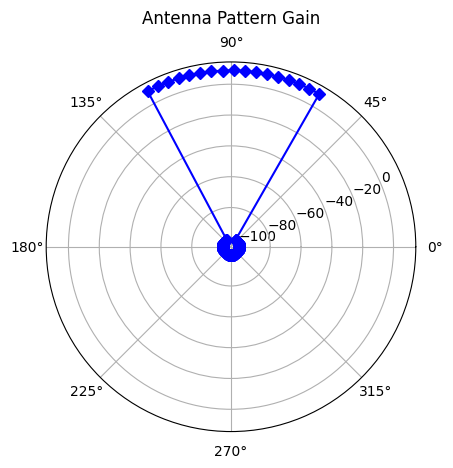

In [5]:
# visualize the antenna pattern 
rx.plot_antenna_pattern()

In [6]:
# create a transmitter node (put 1km away in the x-drection,pointed towards +y with an omnidirectional antenna pattern and relative power of 20 dB)
tx = TxNode(location=[1000,0],direction=[0,1],antenna_pattern=omni,power=20)

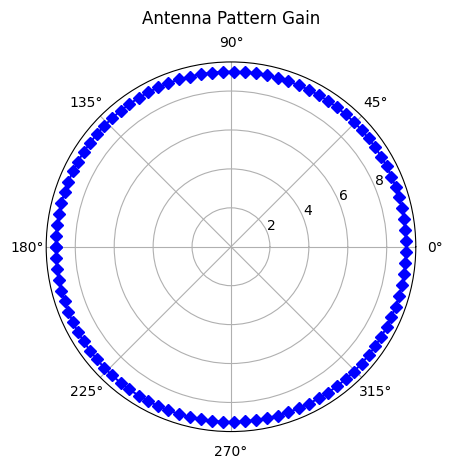

In [7]:
#visualize the antenna pattern 
tx.plot_antenna_pattern()

In [9]:
# now for a specific wavelength (frequency) we can calculate the power at the rx, C is the speed of light
# power at 4 GHz
node_to_node_power(rx,tx,wavelength=C/4e9)

c:\Users\sandersa\.conda\envs\los_simulation\Lib\site-packages\los_simulation\simulations.py:127: RuntimeWarning: invalid value encountered in scalar divide
  inverse_cos =  np.arccos((x1*x2+y1*y2)/(mag_a*mag_b))


np.float64(-175.4889830484426)

In [10]:
# if you notice this is a very small relative power. That is because the rx is a directional antenna pointing away from the tx
# if change the direction to point to the tx we can get a much higher power
rx.direction = [1,0]
node_to_node_power(rx,tx,wavelength=C/4e9)

np.float64(-66.48898304844262)

In [11]:
# and loss is strongly influenced by f (increases as f^2)
node_to_node_power(rx,tx,wavelength=C/1e9)

np.float64(-54.44778322188337)

Text(0.5, 1.0, 'Power as a Function of Distance at 3 GHz')

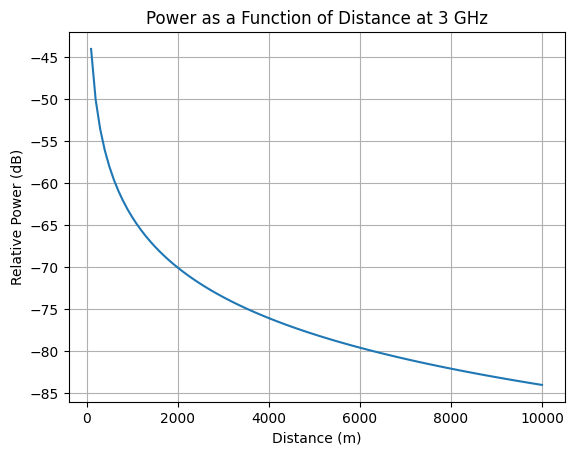

In [12]:
# power as a function of distance is easy this is at 3 GHz
distances = np.linspace(100,10000,100)
powers = []
for distance in distances:
    tx.location = [distance,0]
    power = node_to_node_power(rx,tx,wavelength=C/3e9)
    powers.append(power)
plt.plot(distances,powers)
plt.xlabel("Distance (m)")
plt.ylabel("Relative Power (dB)")
plt.grid()
plt.title("Power as a Function of Distance at 3 GHz")

In [13]:
# if you want to do a number of txs you can find the total by transforming to linear units and then summing
# Here we have number of transmitters around a circle
txs = []
number_transmitters =11
tx_distance = 1000
tx_angles = np.linspace(-np.pi,np.pi-2*np.pi/number_transmitters,number_transmitters)
for i,angle in enumerate(tx_angles):
    location = [tx_distance*np.cos(angle),tx_distance*np.sin(angle)]
    new_tx = TxNode(location=location,direction = [0,1],antenna_pattern = omni, power = -10, id=f"tx_{i}")
    txs.append(new_tx)
# power at 2 GHz
power_list_rx = np.array(list(map(lambda x: node_to_node_power(rx,x,wavelength = C/2e9),txs)))
labels = list(map(lambda x: x.id,txs))
total_power_rx = 10*np.log10(np.sum(10**(power_list_rx/10)))


Text(0, 0.5, 'Power (dB)')

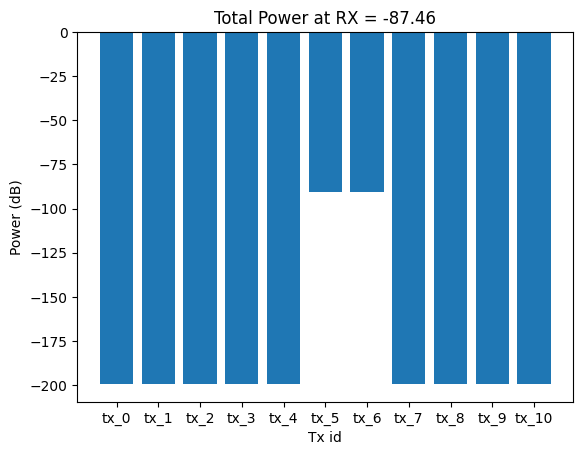

In [14]:
plt.bar(labels, power_list_rx)
plt.title(f"Total Power at RX = {total_power_rx:3.2f}")
plt.xlabel("Tx id")
plt.ylabel("Power (dB)")

Text(0, 0.5, 'Power (dB)')

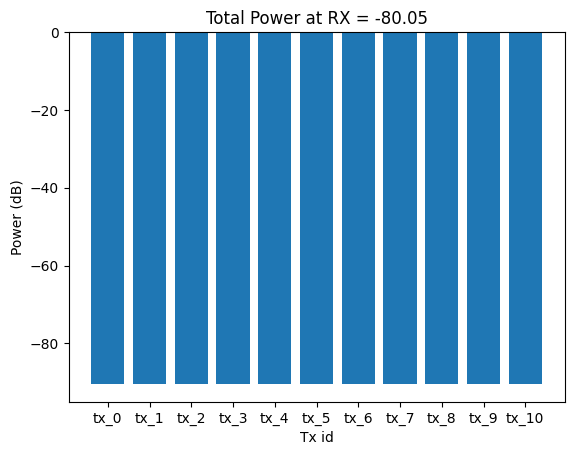

In [15]:
# now if the rx had an omni antenna the txs would contribute equally
rx.antenna_pattern = omni
power_list_rx = np.array(list(map(lambda x: node_to_node_power(rx,x,wavelength = C/2e9),txs)))
labels = list(map(lambda x: x.id,txs))
total_power_rx = 10*np.log10(np.sum(10**(power_list_rx/10)))
plt.bar(labels, power_list_rx)
plt.title(f"Total Power at RX = {total_power_rx:3.2f}")
plt.xlabel("Tx id")
plt.ylabel("Power (dB)")

Text(0.5, 1.0, 'Power at Rx with Omni at 2 GHz')

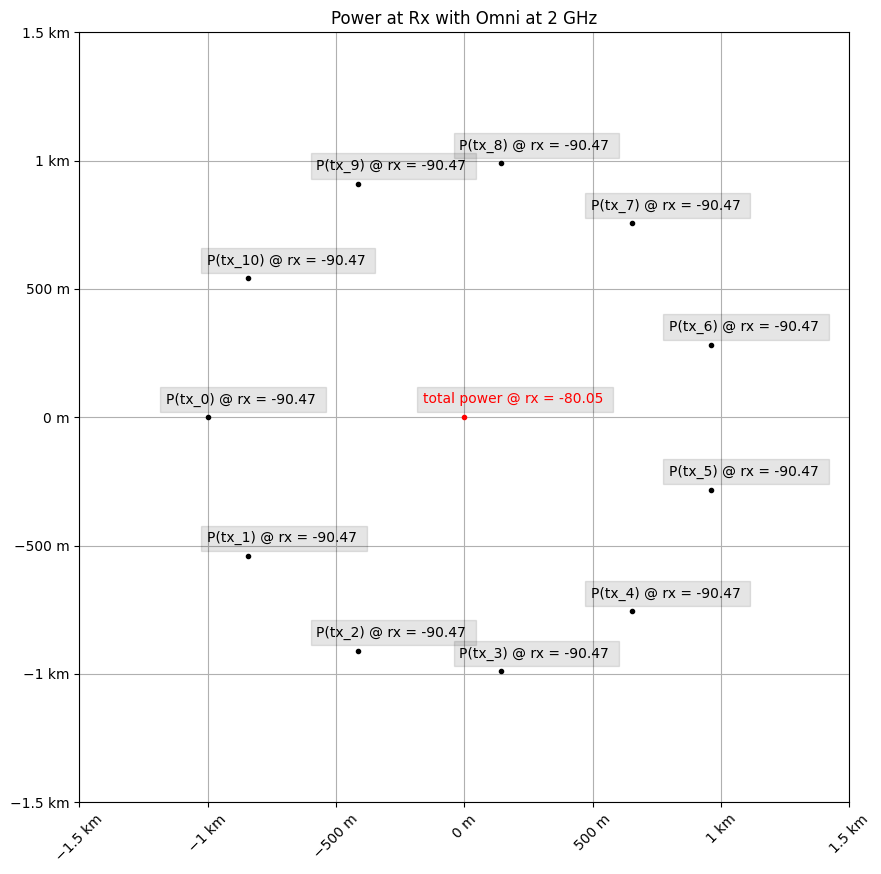

In [16]:
# now we can visualize this example by plotting each transmitter and a RX
from matplotlib.ticker import EngFormatter
formatter0 = EngFormatter(unit='m')
fig,ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.xaxis.set_major_formatter(formatter0)
ax.yaxis.set_major_formatter(formatter0)
ax.tick_params(axis='x', labelrotation=45)

ax.plot(rx.location[0],rx.location[1],"r.")
ax.annotate(f"total power @ rx = {total_power_rx:3.2f} ",
                xy=(rx.location[0], rx.location[1]), xycoords='data',
                xytext=(-30, 10), textcoords='offset points',color="r",bbox=dict(facecolor='k', alpha=0.1))
for i,tx in enumerate(txs):
    ax.plot(tx.location[0],tx.location[1],"k.")
    ax.annotate(f"P({tx.id}) @ rx = {power_list_rx[i]:3.2f} ",
                xy=(tx.location[0], tx.location[1]), xycoords='data',
                xytext=(-30, 10), textcoords='offset points',color="k",bbox=dict(facecolor='k', alpha=0.1))
ax.set_xlim([-1.5*tx_distance,1.5*tx_distance])
ax.set_ylim([-1.5*tx_distance,1.5*tx_distance])
plt.grid()
plt.title("Power at Rx with Omni at 2 GHz")

In [17]:
# finally there are several scenario generators with more advanced graphics in the package
help(create_scenario_1)

Help on function create_scenario_1 in module los_simulation.simulations:

create_scenario_1(
    number_tx=10,
    mean_tx_spacing=1000,
    relative_tx_power=76,
    wavelength=0.07994465546666667,
    show=True,
    save=False
)
    Creates a simple scenario of 2 receivers at the origin, one is an omni directional and the other is a simple directional pointed in the 1i+1j direction. The number of transmitters
    are placed at random locations determined by mean_tx_spacing * uniform([-1,1]) in x and y amd are all omni directional emitters with a relative_tx_power. The
    total power is calculated using a linear summation of powers for the wavelength using the friis formula. To save the image either specify save = path or save = True.



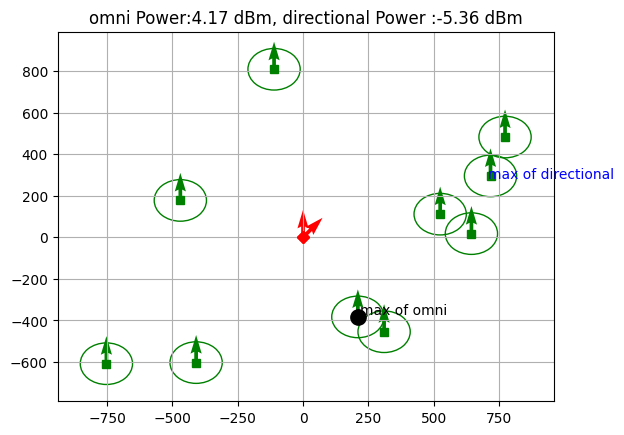

In [18]:
create_scenario_1(number_tx=10,
    mean_tx_spacing=1000,
    relative_tx_power=76,
    wavelength=0.07994465546666667,
    show=True,
    save=False)

In [23]:
help(create_scenario_2)

Help on function create_scenario_2 in module los_simulation.simulations:

create_scenario_2(
    number_tx=10,
    randomize_direction=True,
    r_tower_min=0,
    r_tower_max=100000,
    angle_tower_min=-3.141592653589793,
    angle_tower_max=3.141592653589793,
    transmitter_antenna_patten=<function simple_directional_gain at 0x0000024CB71EEB60>,
    relative_tx_power=76,
    wavelength=0.07994465546666667,
    show=True,
    save=False
)
    Creates a simple scenario of 2 receivers at the origin, one is an omni directional and the other is a simple directional pointed in the 1i+1j direction. The number of transmitters
    are placed at random locations between a  radius of r_tower_min and r_tower_max and an angle of angle_tower_min and angle_tower_max. Each transmitter has either has a randomized
    direction or is pointed in the [0,1] direction and has transmitter_antenna_patten with relative_tx_power.
    The total power is calculated using a linear summation of powers for the w

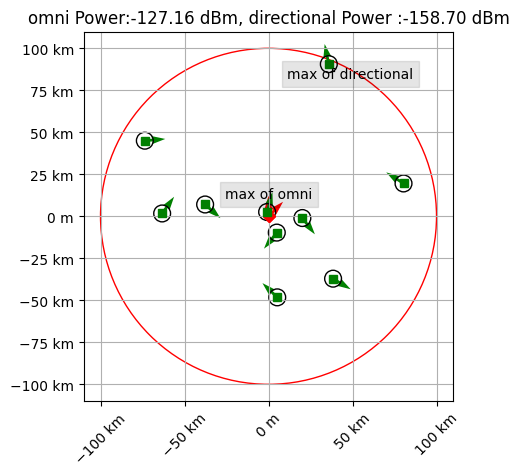

In [20]:
create_scenario_2()

In [24]:
help(create_scenario_3)

Help on function create_scenario_3 in module los_simulation.simulations:

create_scenario_3(
    number_tx=10,
    randomize_direction=False,
    r_tower_min=0,
    r_tower_max=100000,
    angle_tower_min=-3.141592653589793,
    angle_tower_max=3.141592653589793,
    theta1=-0.17453292519943295,
    theta2=0.17453292519943295,
    transmitter_antenna_patten=<function omni at 0x0000024CC6386F20>,
    relative_tx_power=76,
    wavelength=0.07994465546666667,
    show=True,
    save=False
)
    Creates a simple scenario of 2 receivers at the origin, one is an omni directional and the other is a simple directional pointed in the 1i+1j direction. The number of transmitters
    are placed at random locations between a  radius of r_tower_min and r_tower_max and an angle of angle_tower_min and angle_tower_max. Each transmitter has either has a randomized
    direction or is pointed in the [0,1] direction and has transmitter_antenna_patten with relative_tx_power.
    The total power is calculat

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13585824..1.1424853].


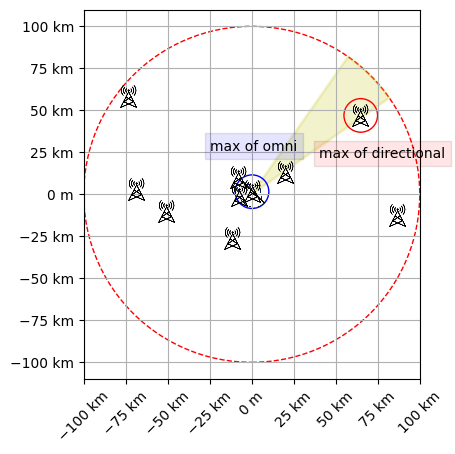

In [21]:
create_scenario_3()

In [25]:
help(create_scenario_4)

Help on function create_scenario_4 in module los_simulation.simulations:

create_scenario_4(
    number_tx=4,
    randomize_direction=False,
    r_tower_min=100000,
    r_tower_max=100000,
    angle_tower_min=-3.141592653589793,
    angle_tower_max=3.141592653589793,
    theta1=-0.17453292519943295,
    theta2=0.17453292519943295,
    transmitter_antenna_patten=<function omni at 0x0000024CC6386F20>,
    relative_tx_power=76,
    wavelength=0.07994465546666667,
    show=True,
    save=False
)
    Creates a simple scenario of 2 receivers at the origin, one is an omni directional and the other is a simple directional rotated through 360 degrees . The number of transmitters
    are placed at random locations between a  radius of r_tower_min and r_tower_max and an angle of angle_tower_min and angle_tower_max. Each transmitter has either has a randomized
    direction or is pointed in the [0,1] direction and has transmitter_antenna_patten with relative_tx_power. The transmitter at
    The to

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9.514622e-17..1.0].
c:\Users\sandersa\.conda\envs\los_simulation\Lib\site-packages\los_simulation\simulations.py:127: RuntimeWarning: invalid value encountered in scalar divide
  inverse_cos =  np.arccos((x1*x2+y1*y2)/(mag_a*mag_b))
c:\Users\sandersa\.conda\envs\los_simulation\Lib\site-packages\los_simulation\simulations.py:231: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


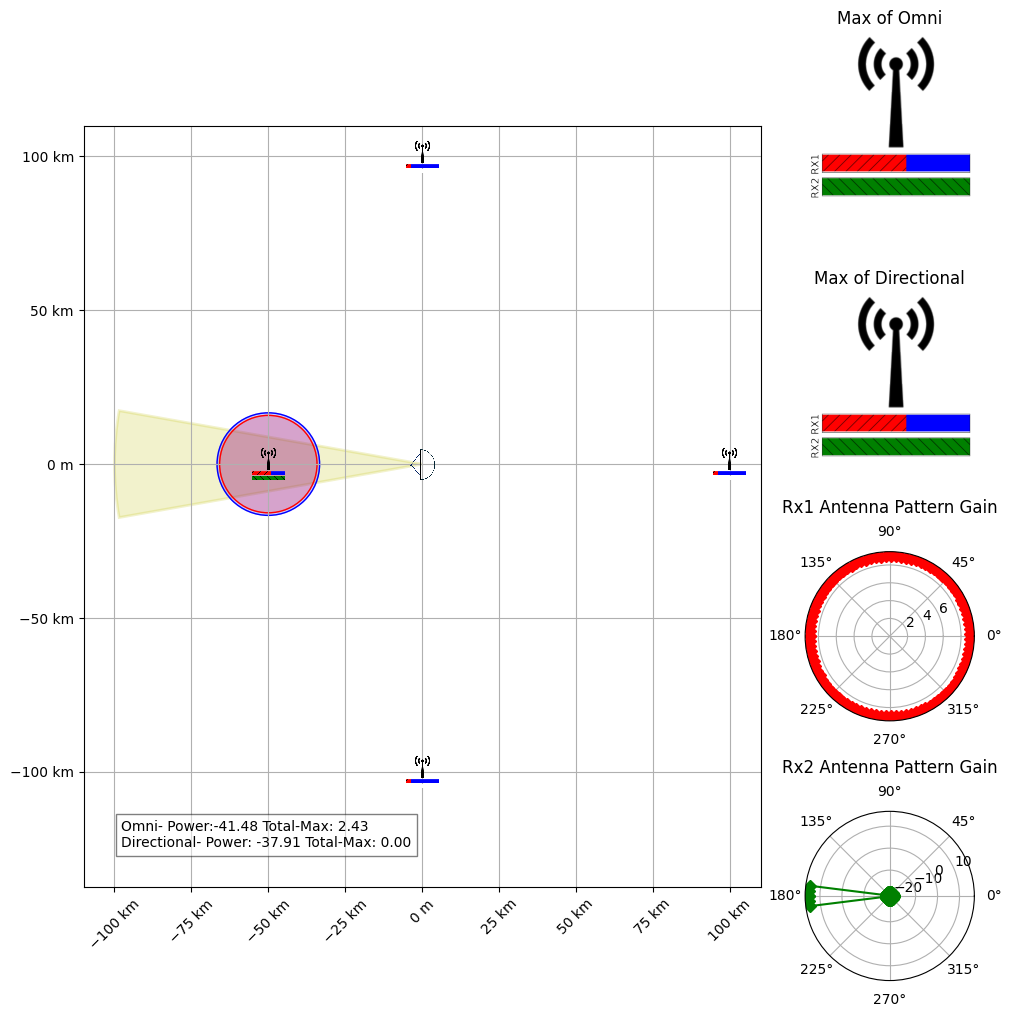

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14469282..1.1324196].


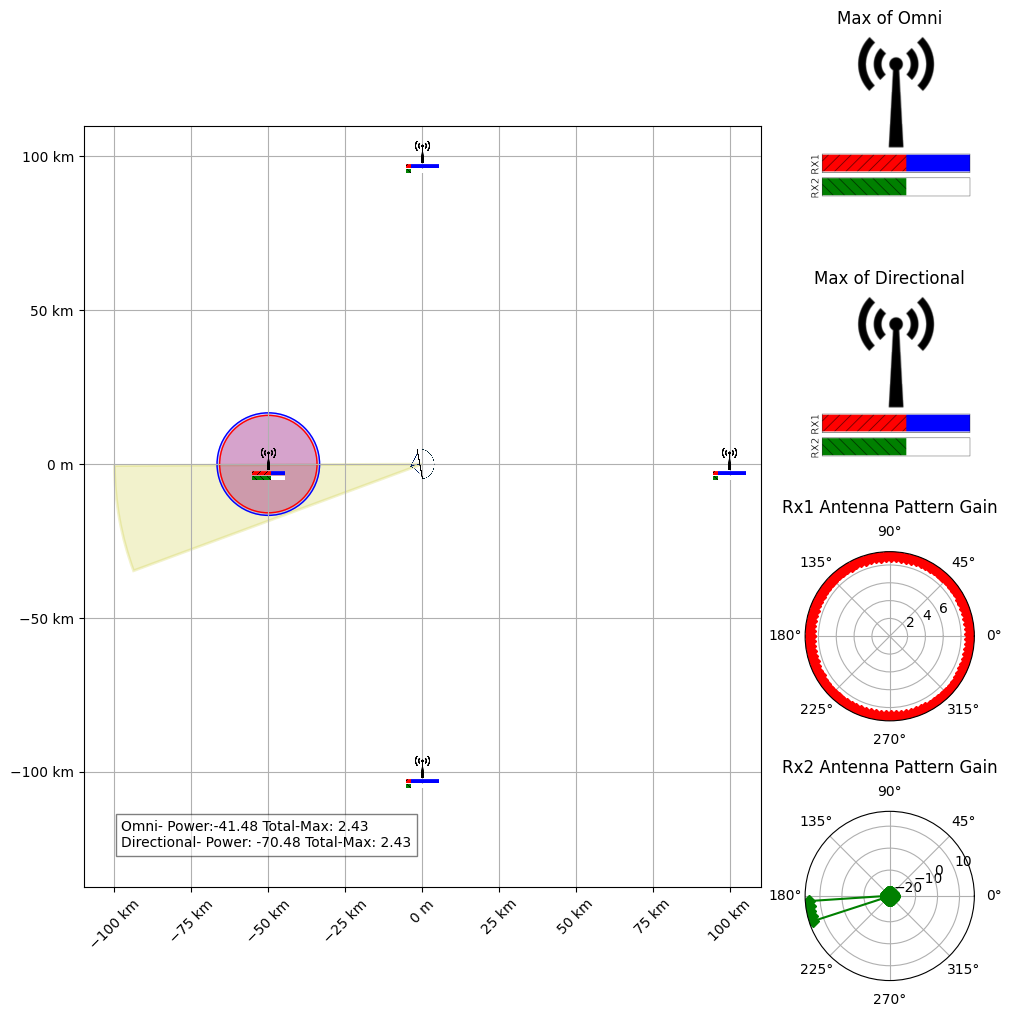

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14667329..1.1282845].


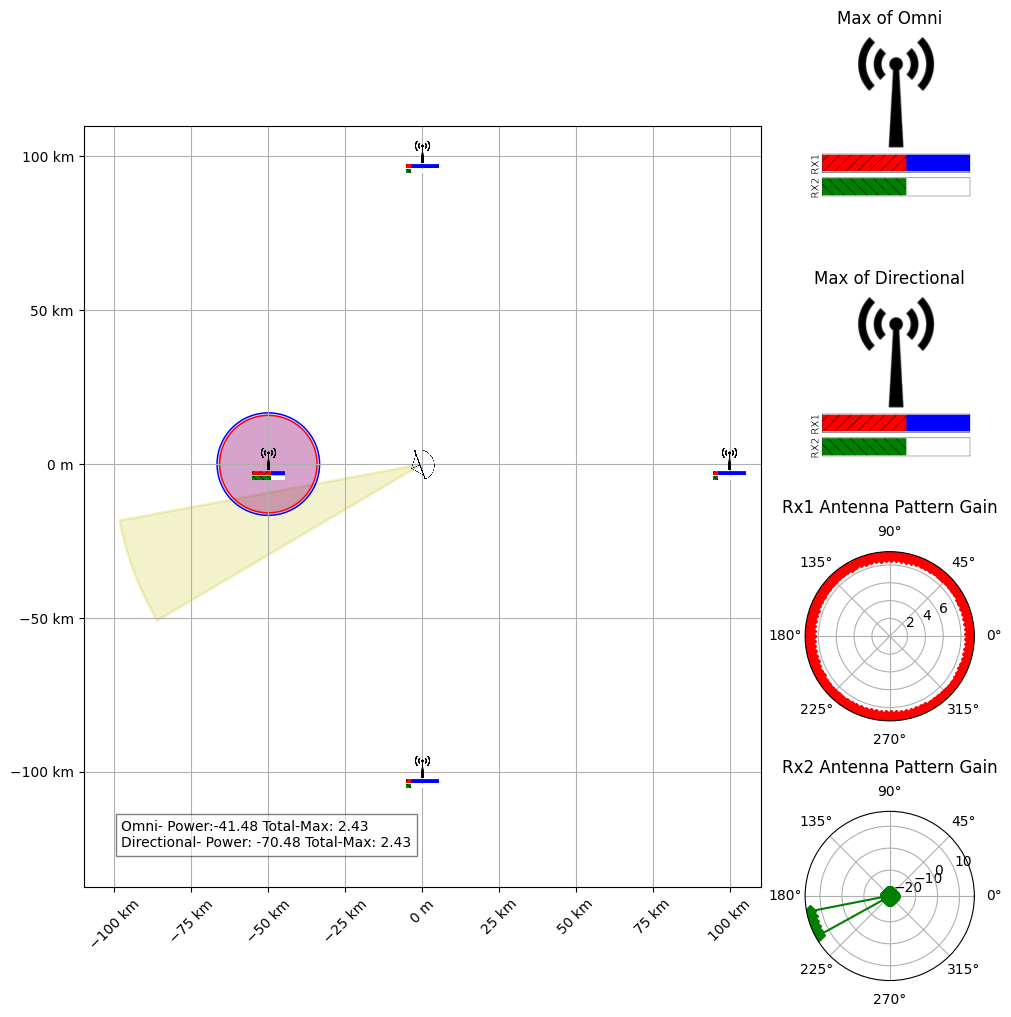

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.16133085..1.1300441].


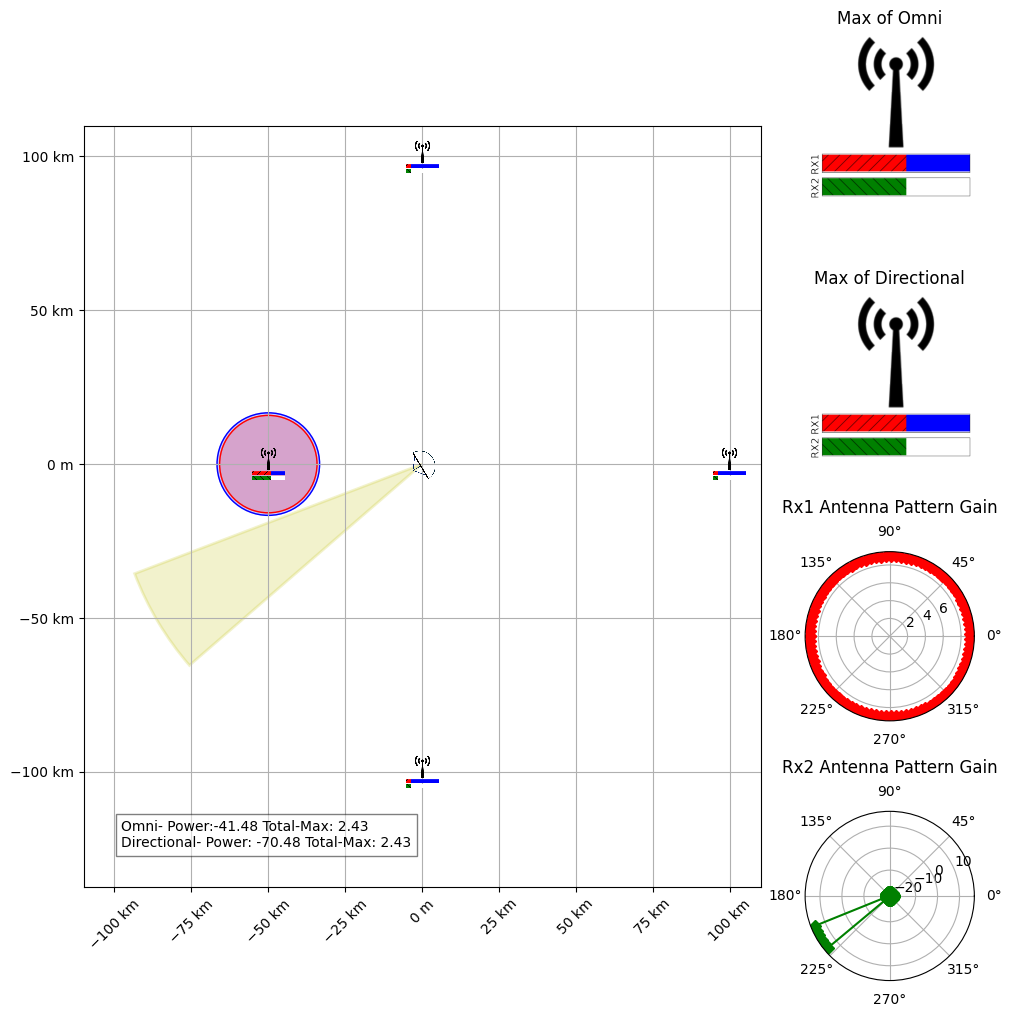

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14916088..1.1323578].


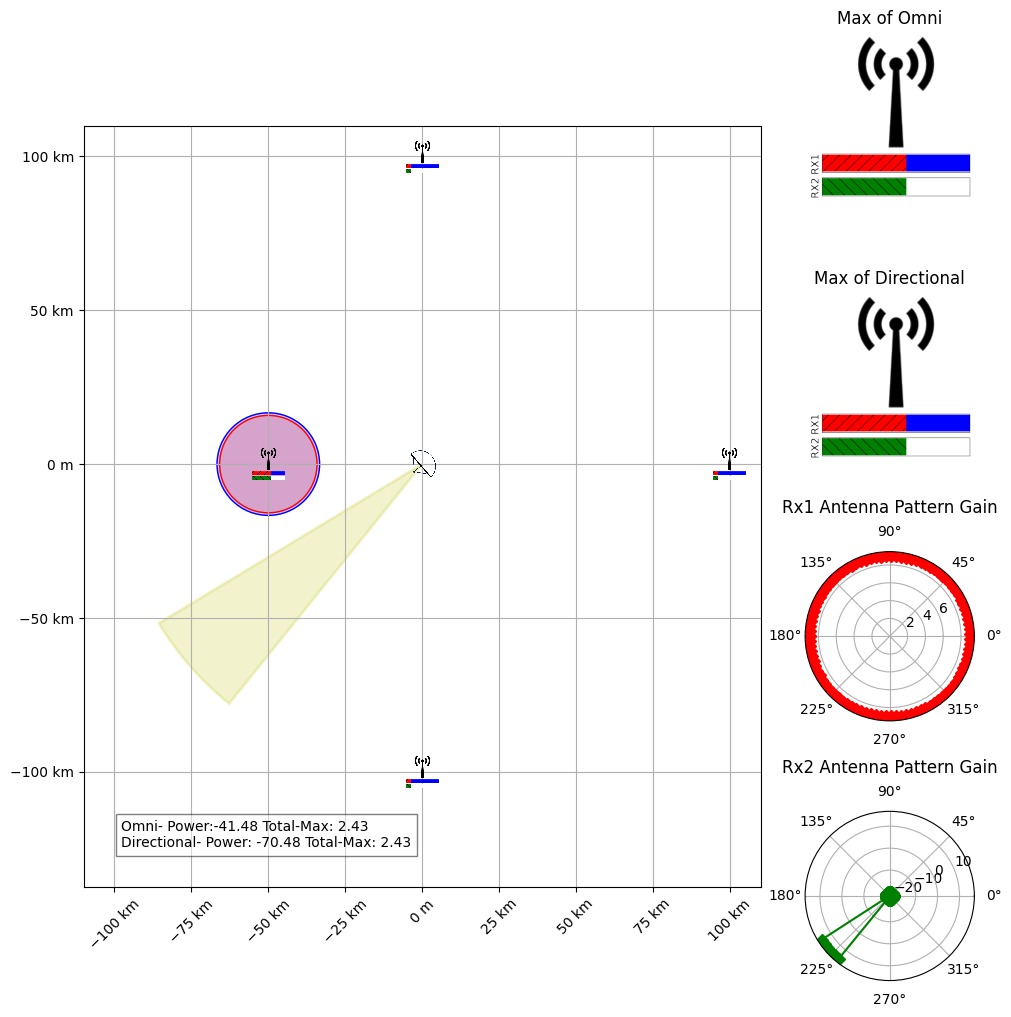

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13158156..1.1307231].


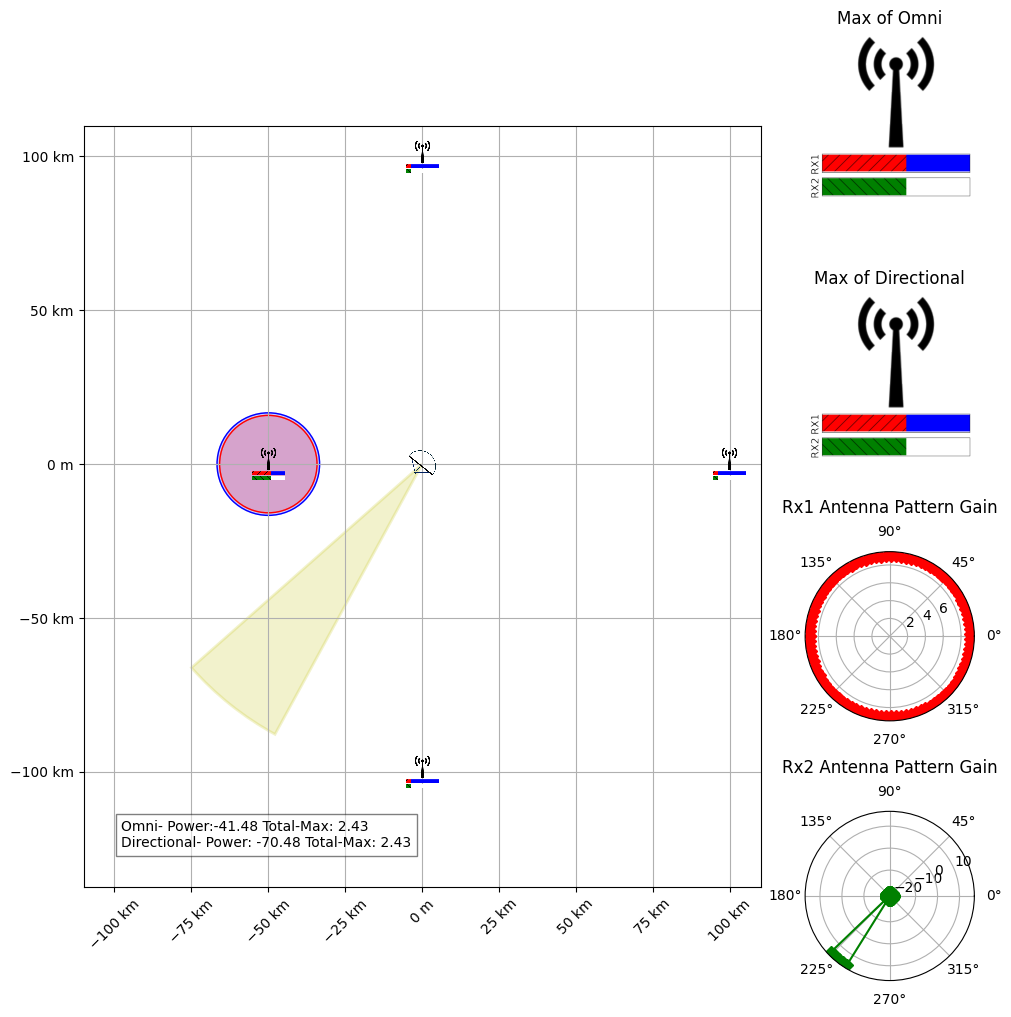

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13369785..1.1257483].


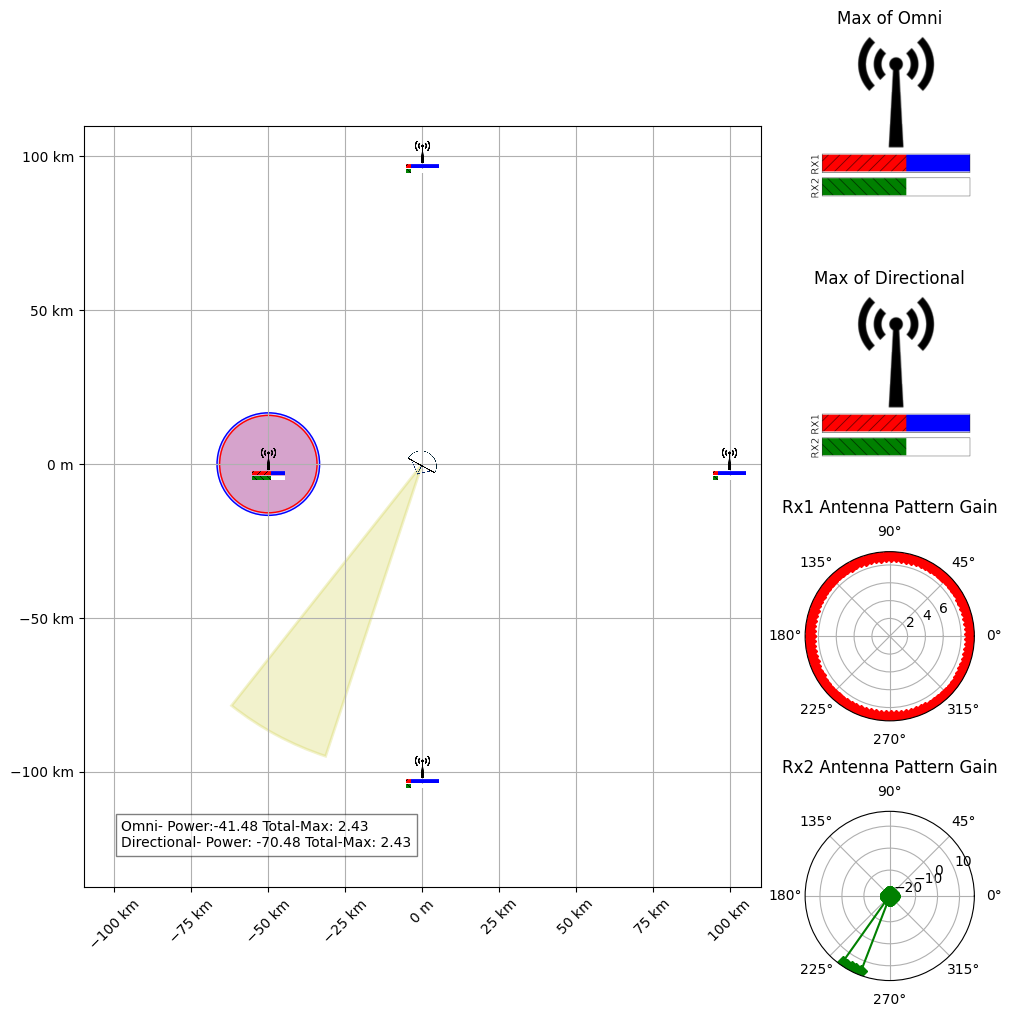

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15052195..1.1321461].


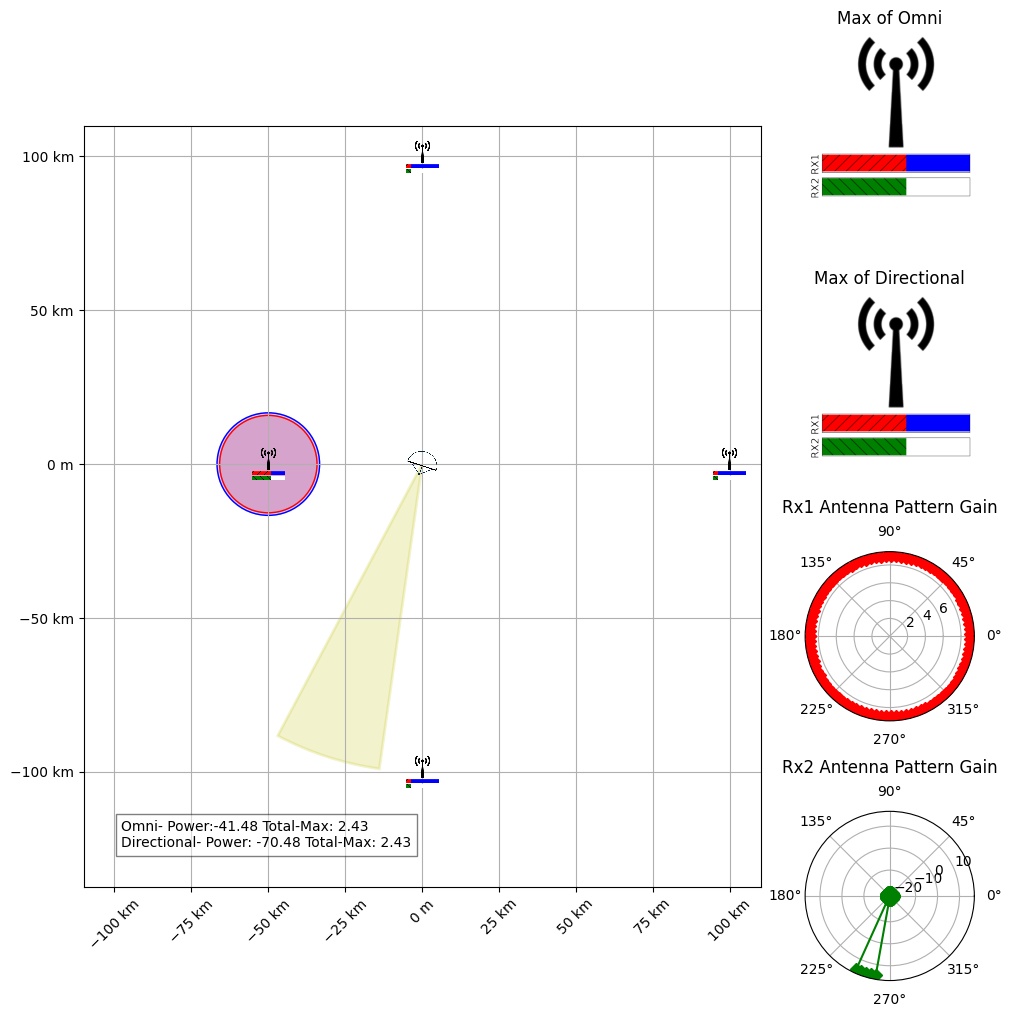

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14799033..1.1310728].


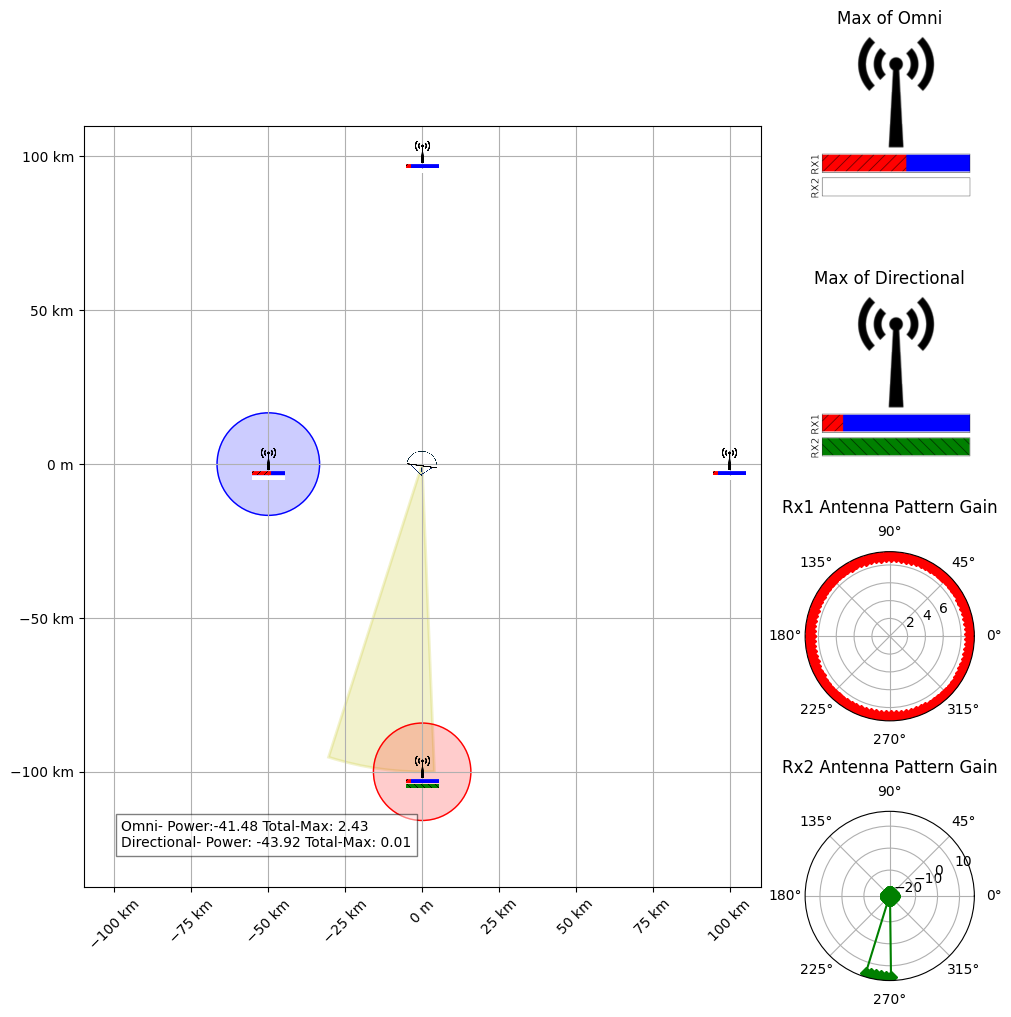

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13210948..1.1398909].


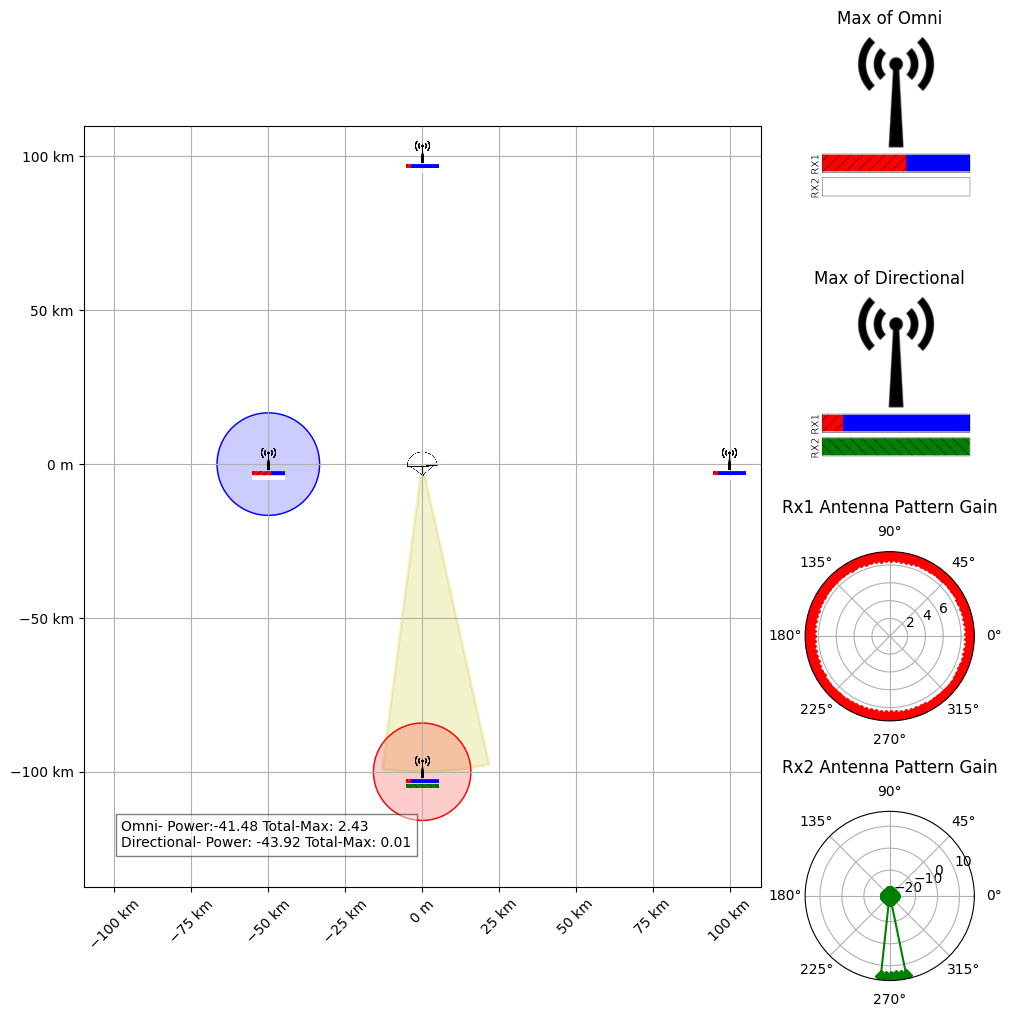

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14598528..1.1302075].


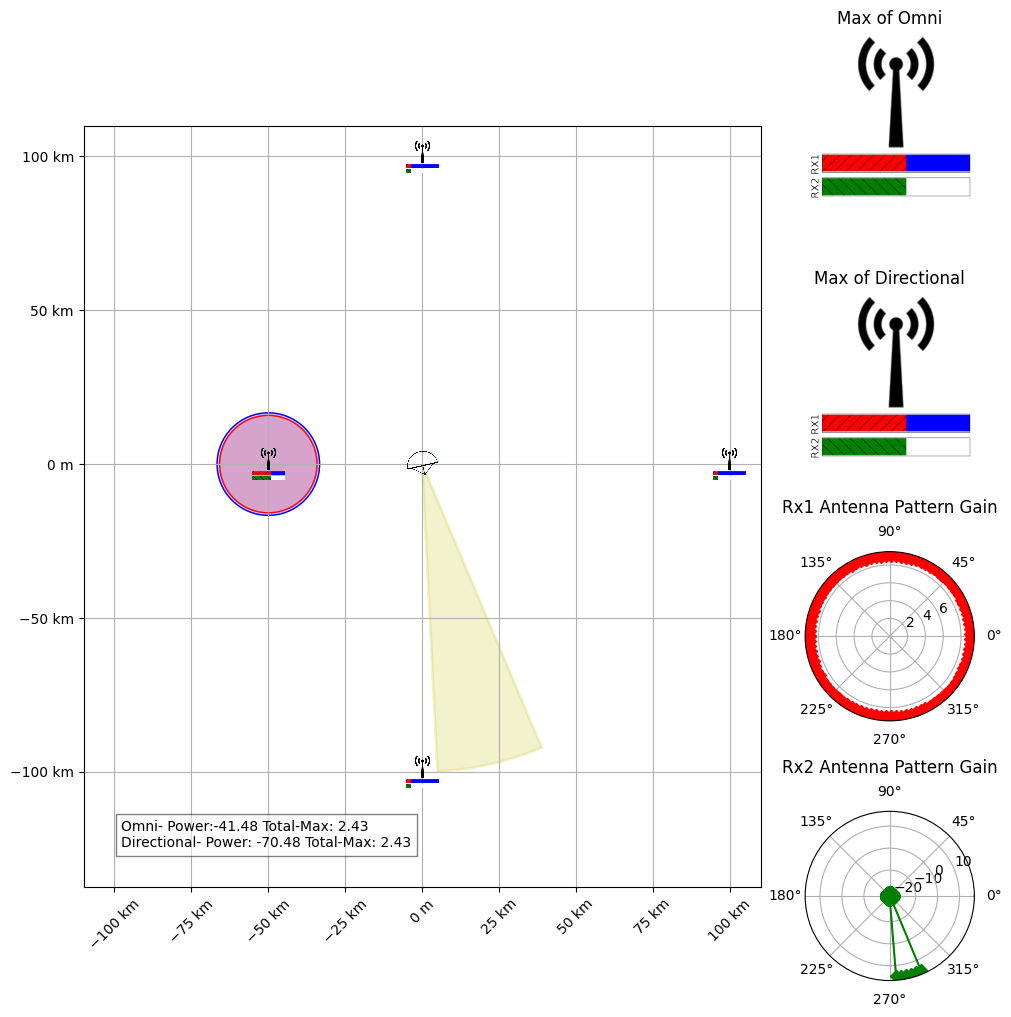

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1449995..1.1210817].


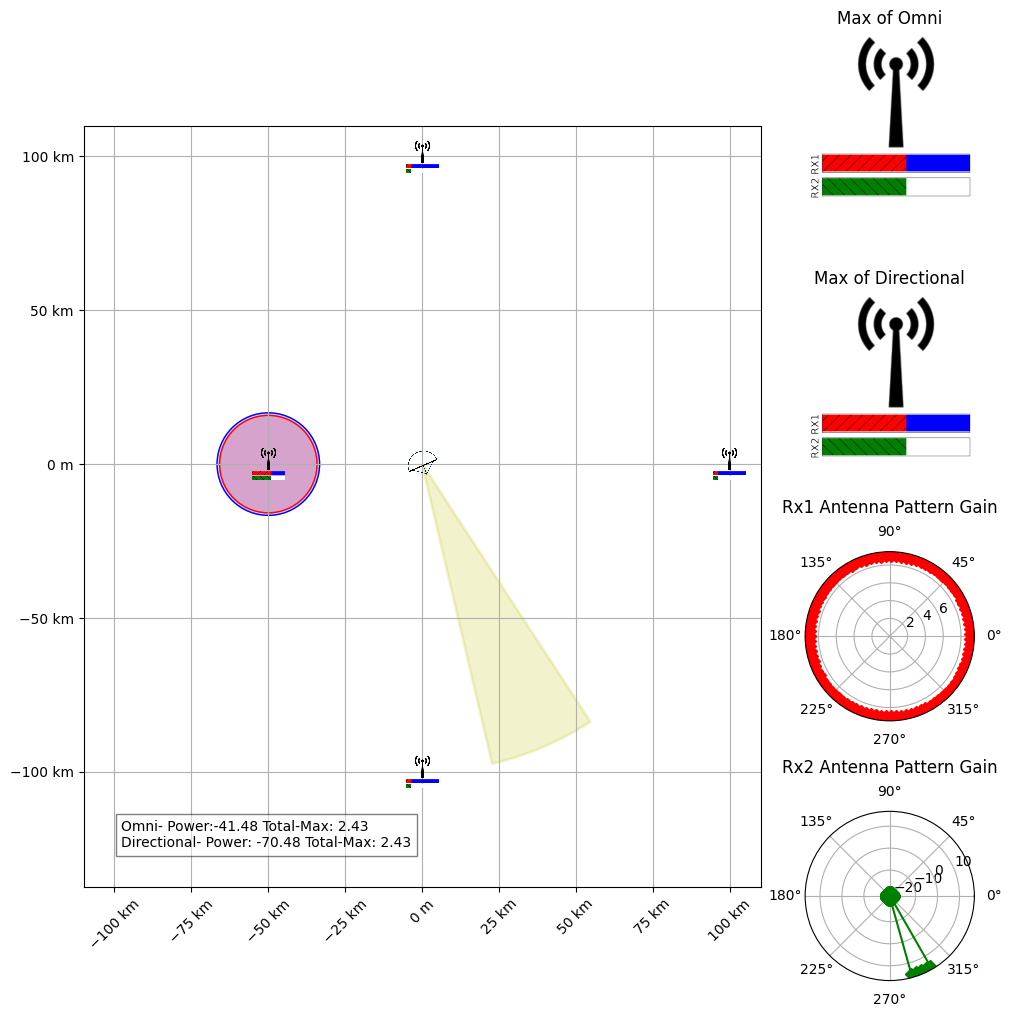

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.16526906..1.1285253].


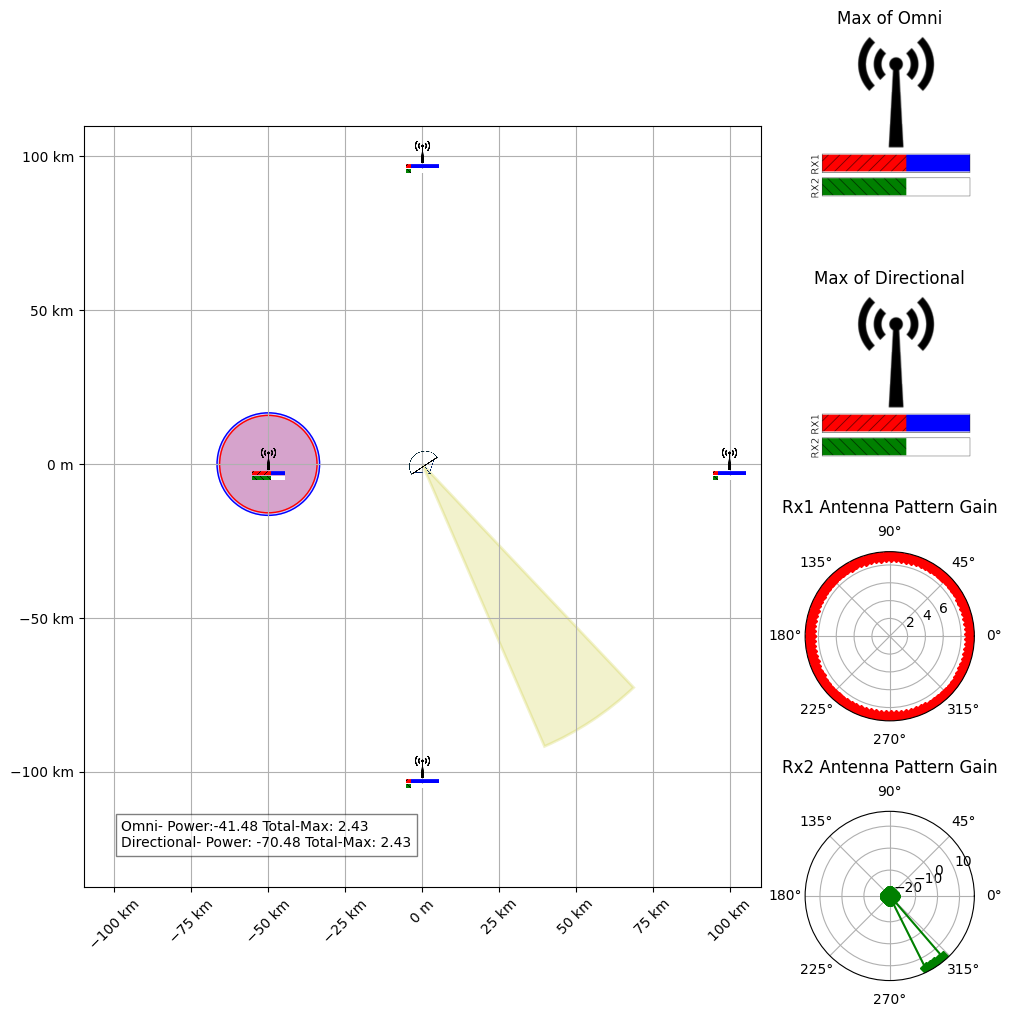

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15871815..1.1319381].


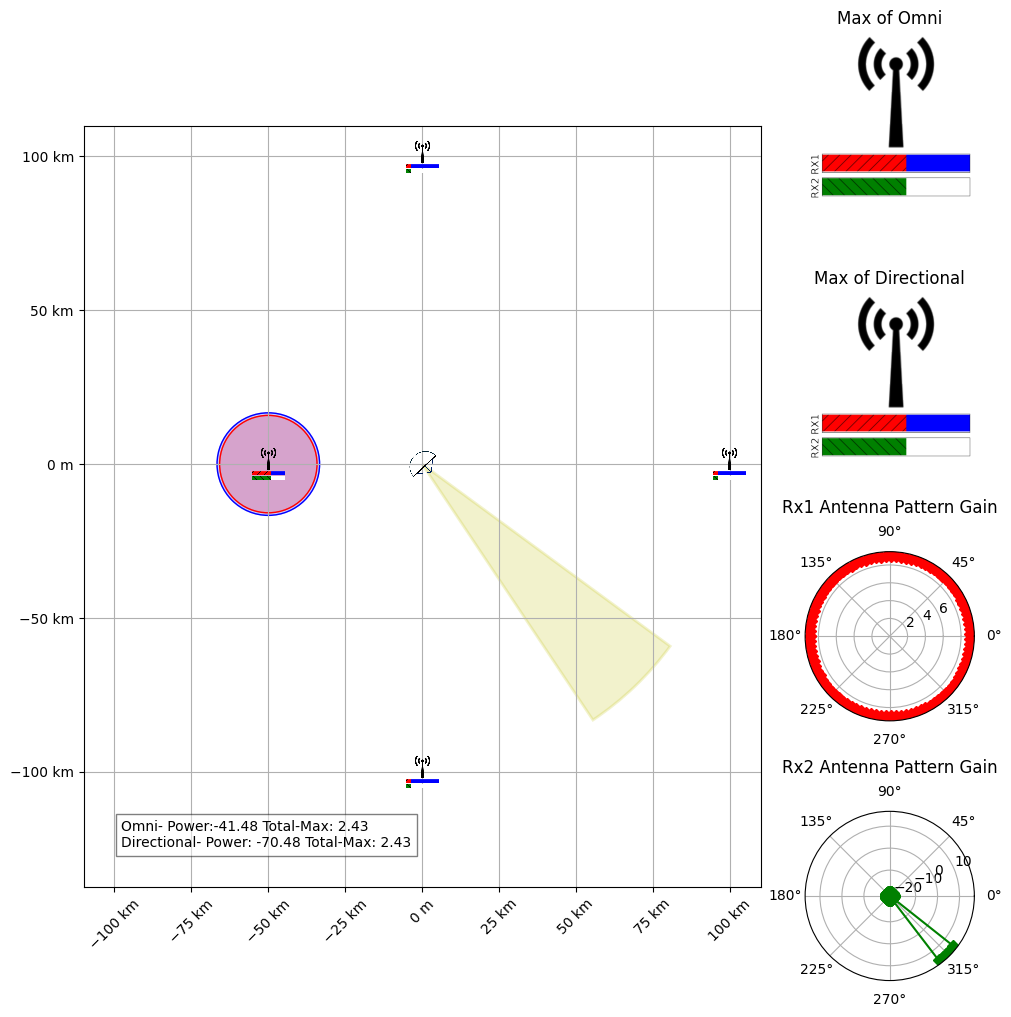

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14840125..1.1293788].


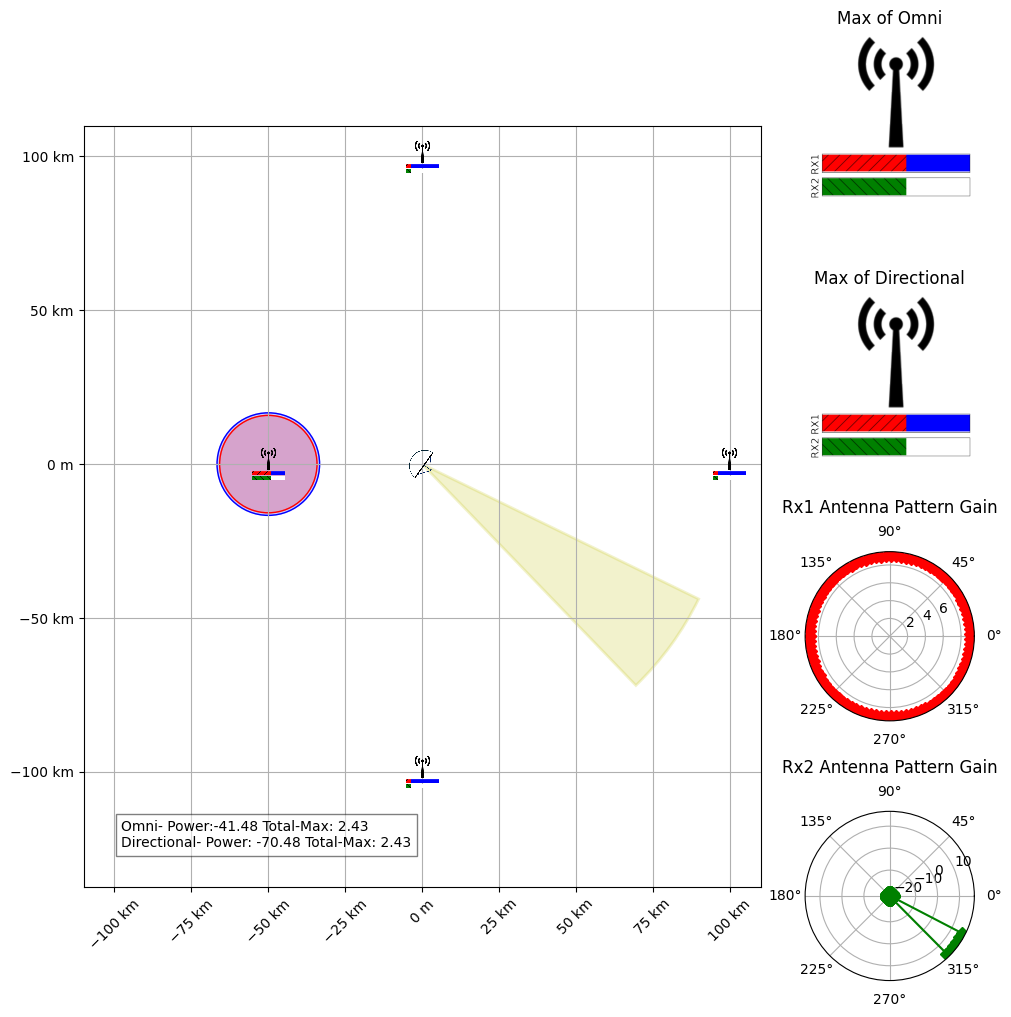

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14162196..1.1442704].


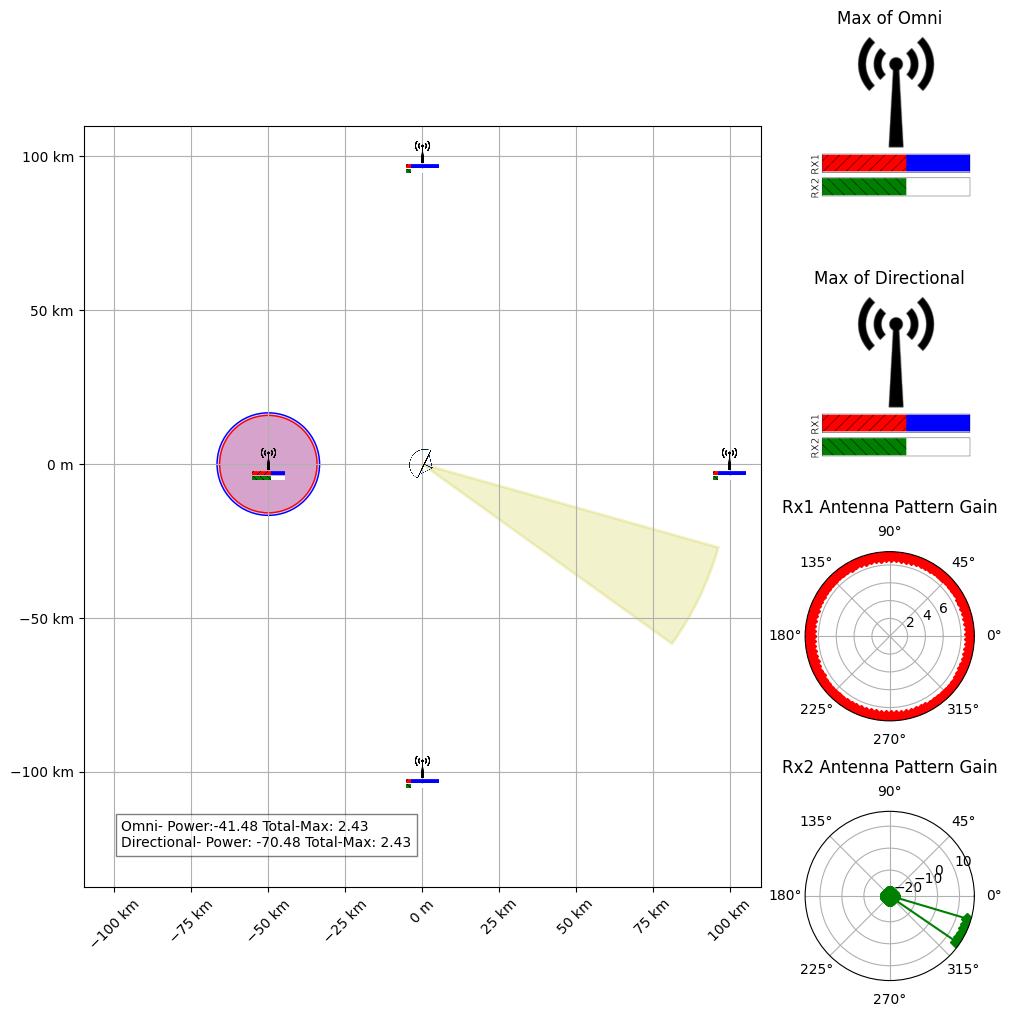

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15145667..1.1419963].


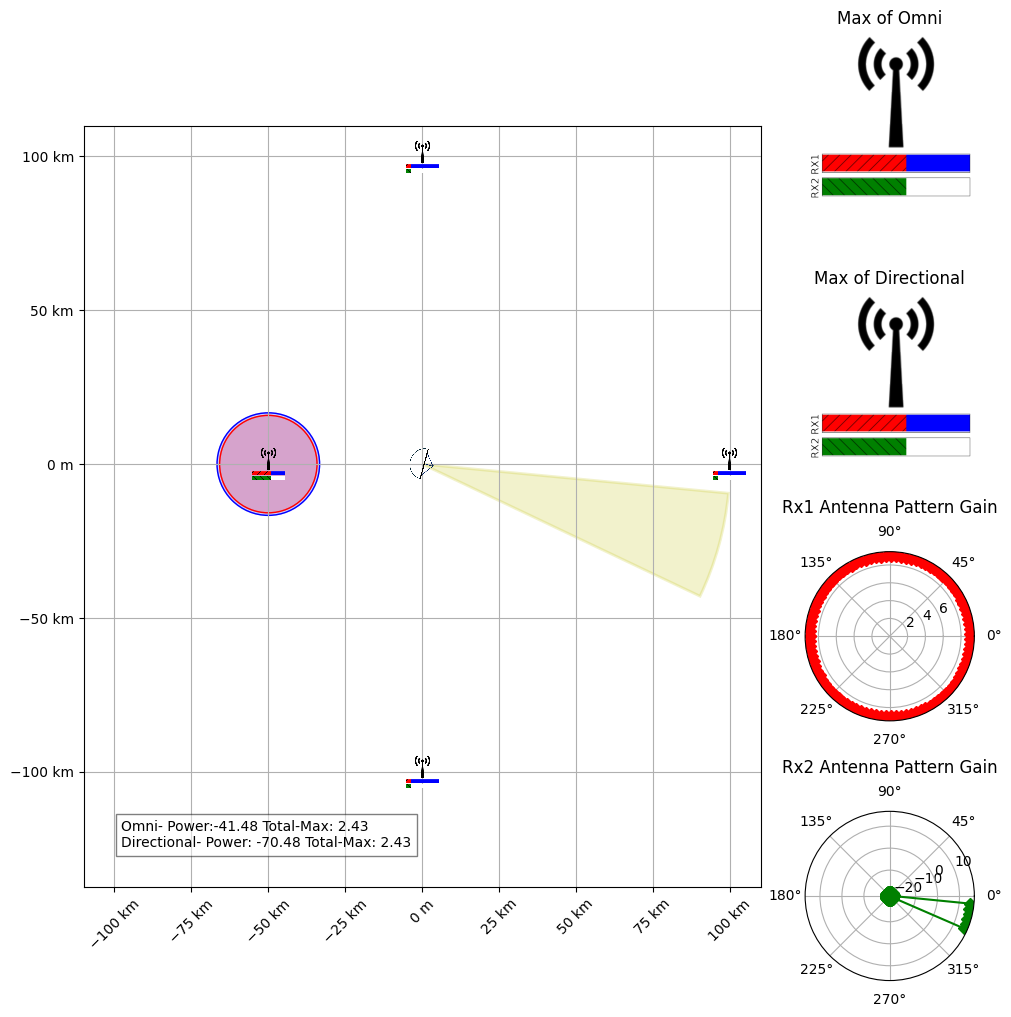

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13166134..1.1285937].


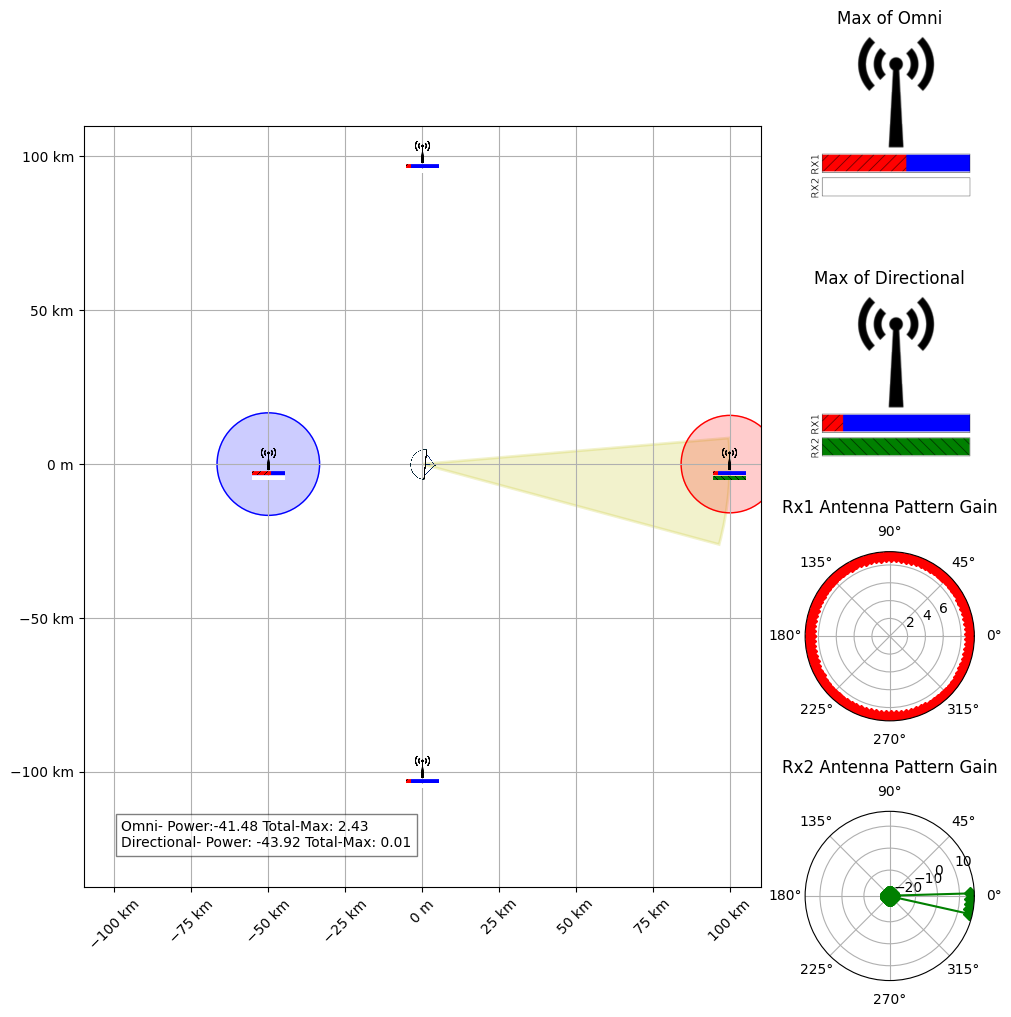

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14572024..1.1470859].


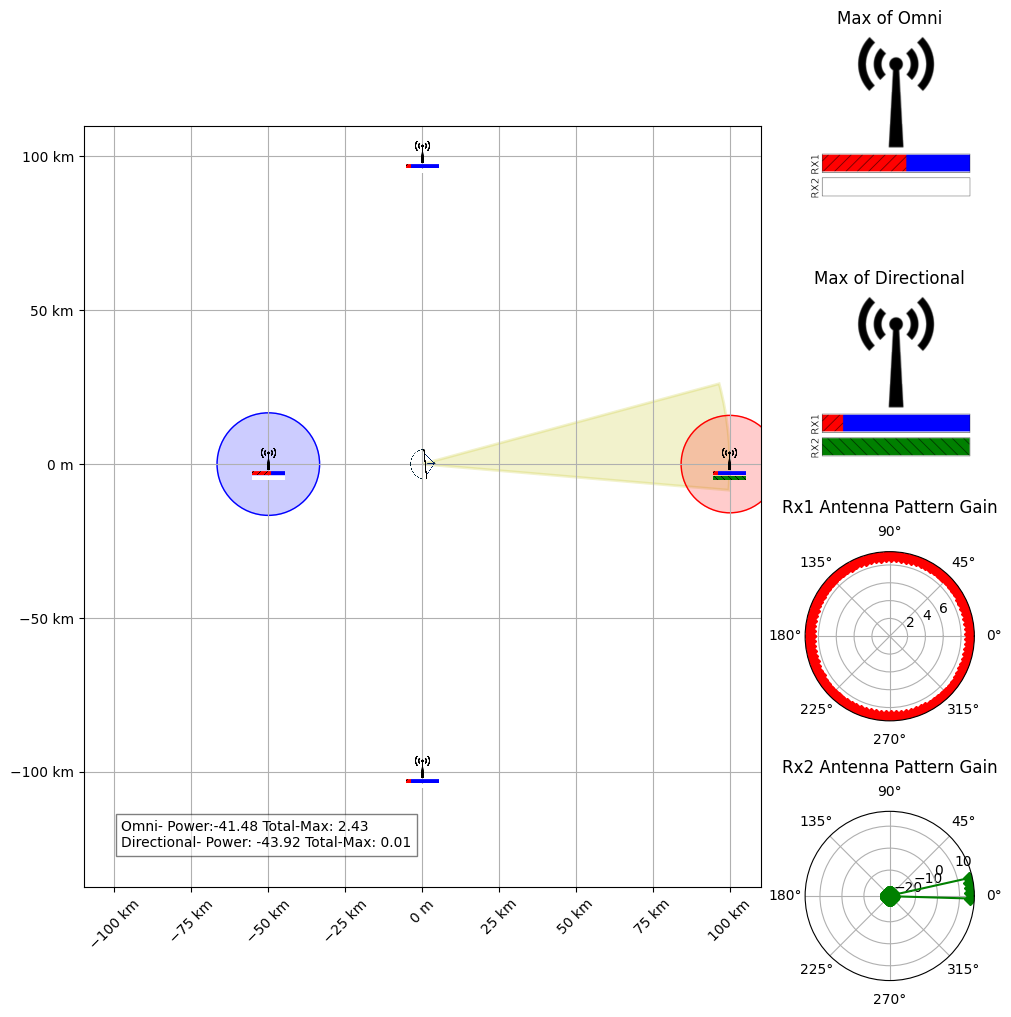

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13408153..1.1339421].


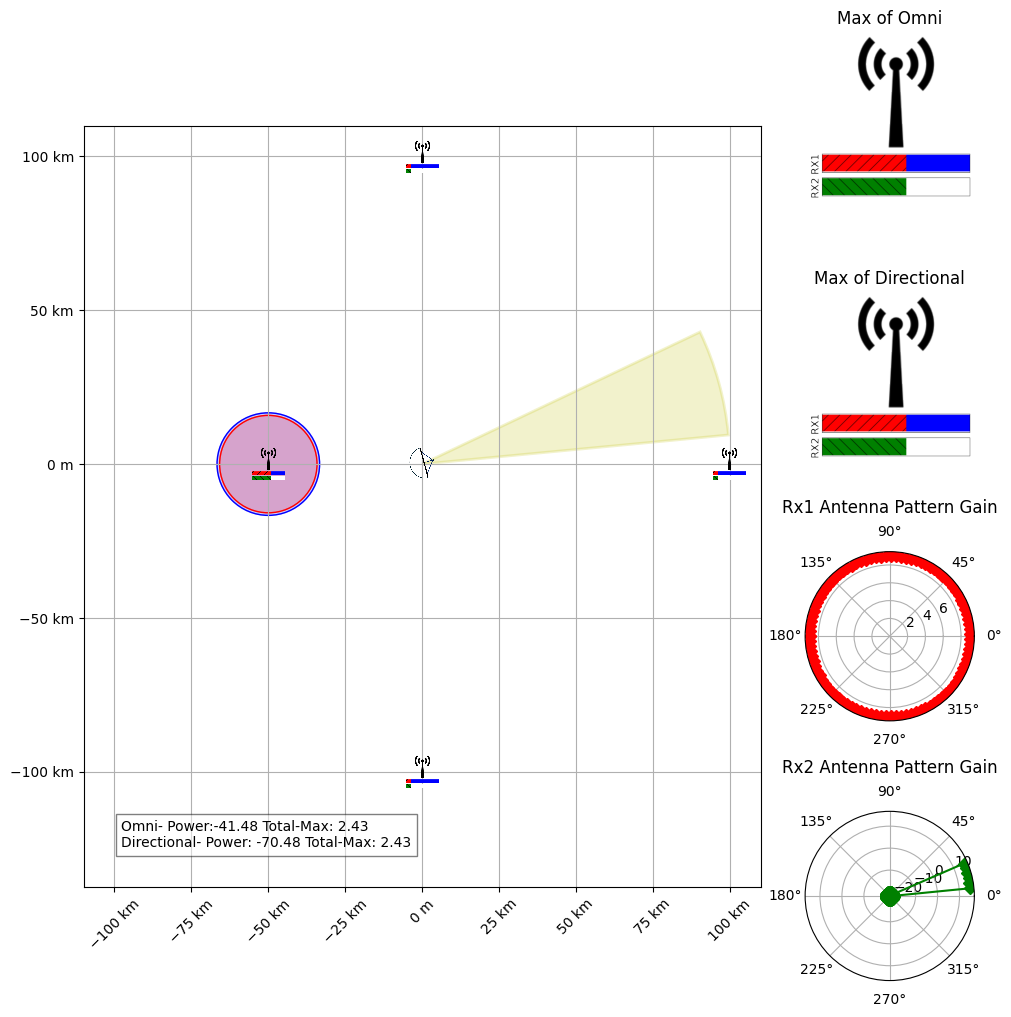

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15881468..1.1318659].


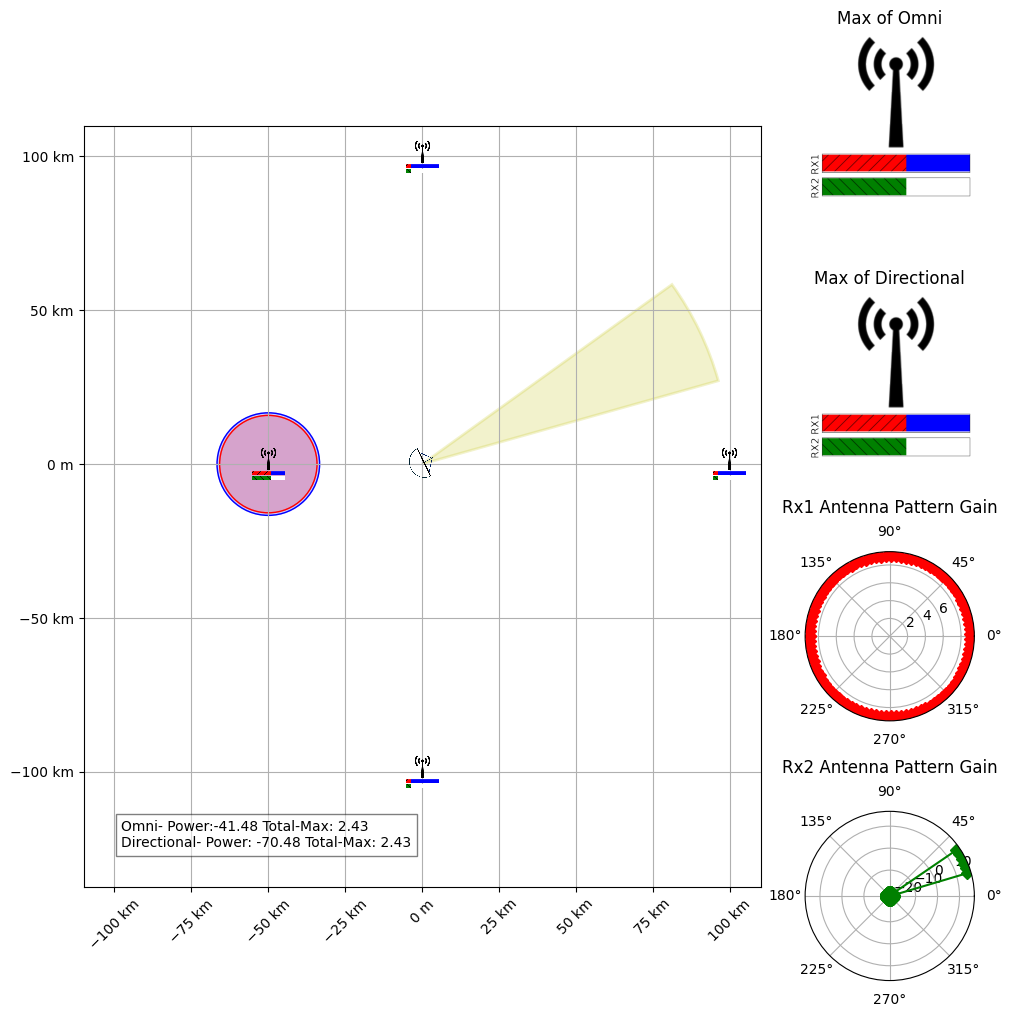

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1334655..1.1437919].


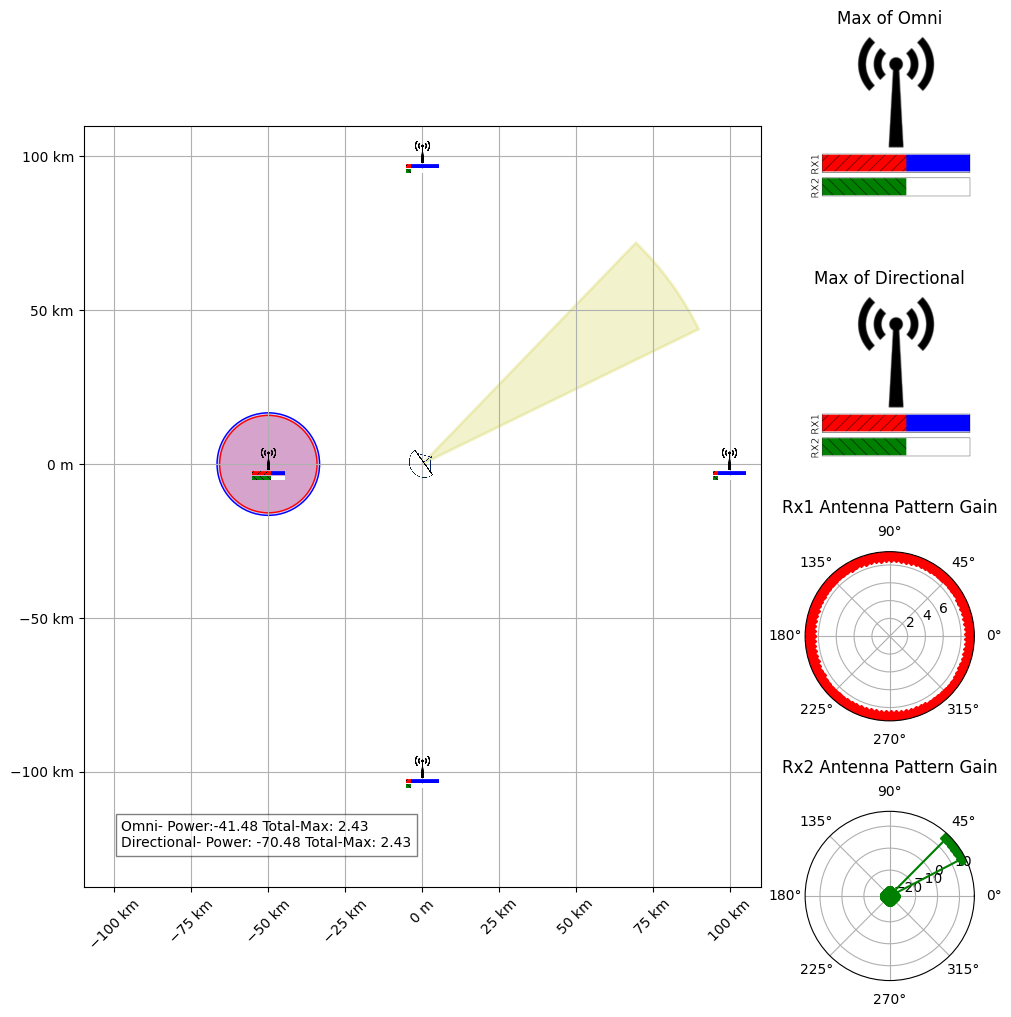

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.16516581..1.1396711].


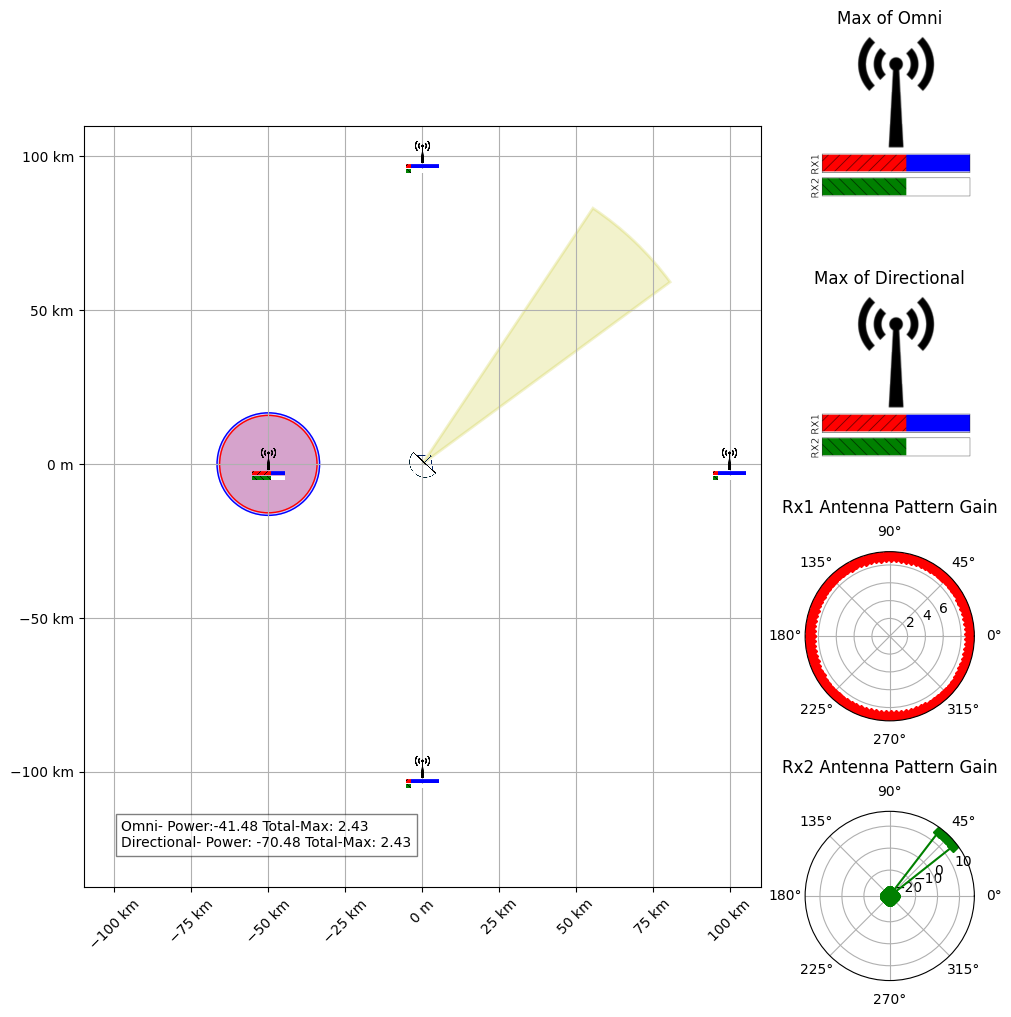

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13126777..1.1313418].


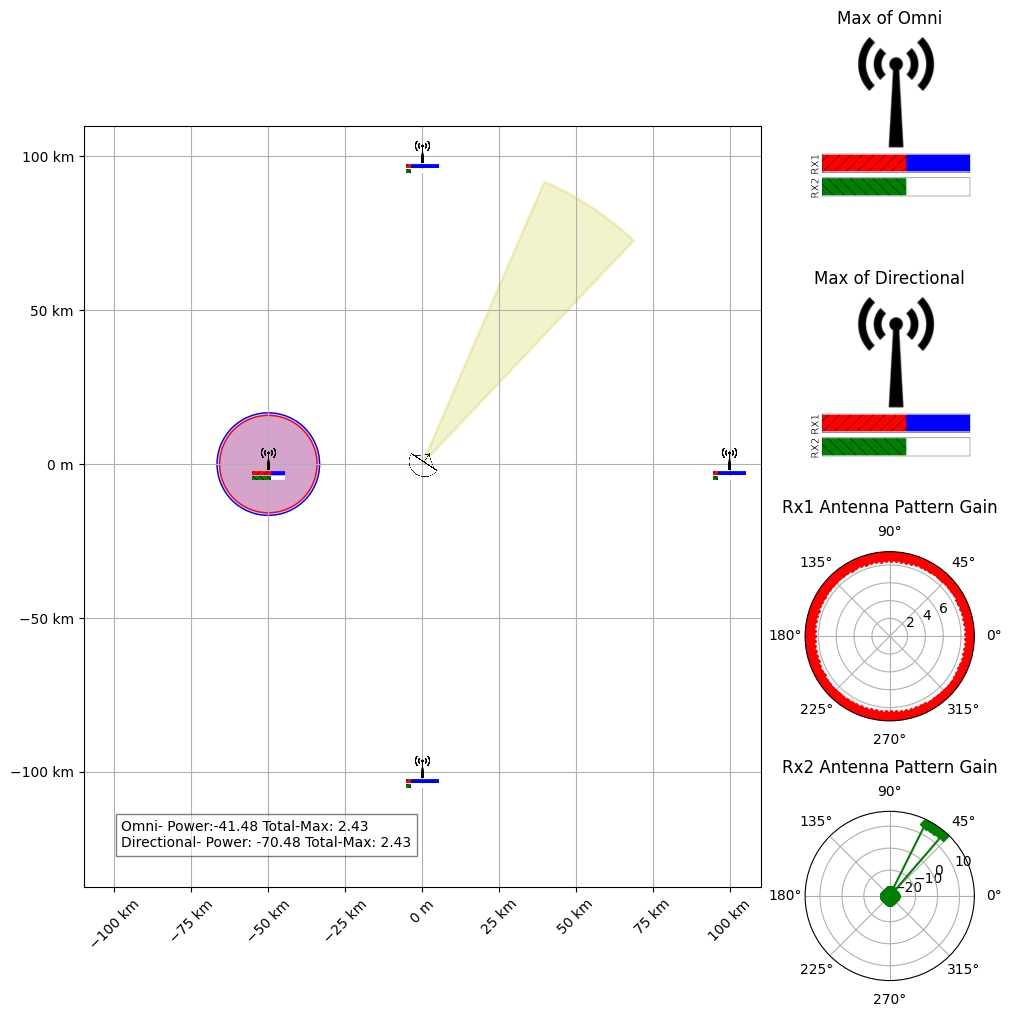

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13478456..1.1312853].


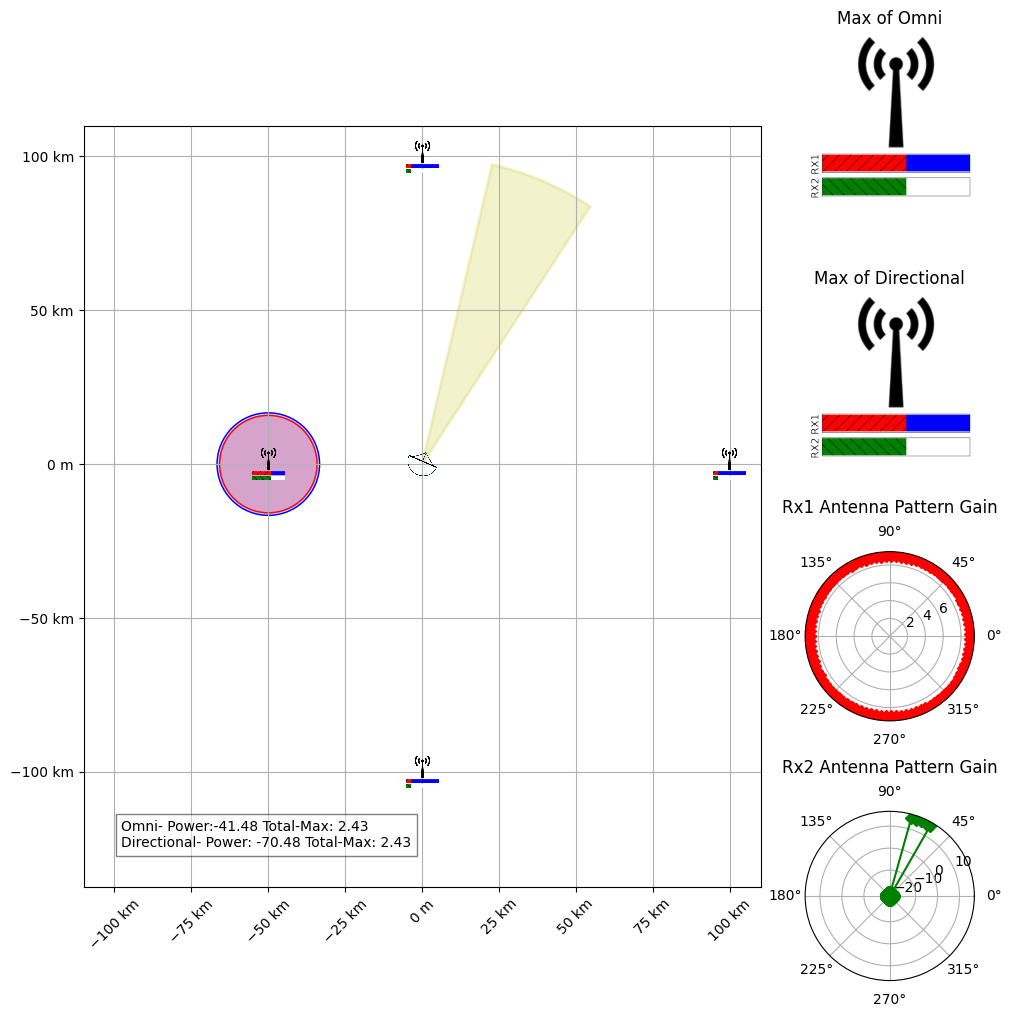

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1398363..1.1322601].


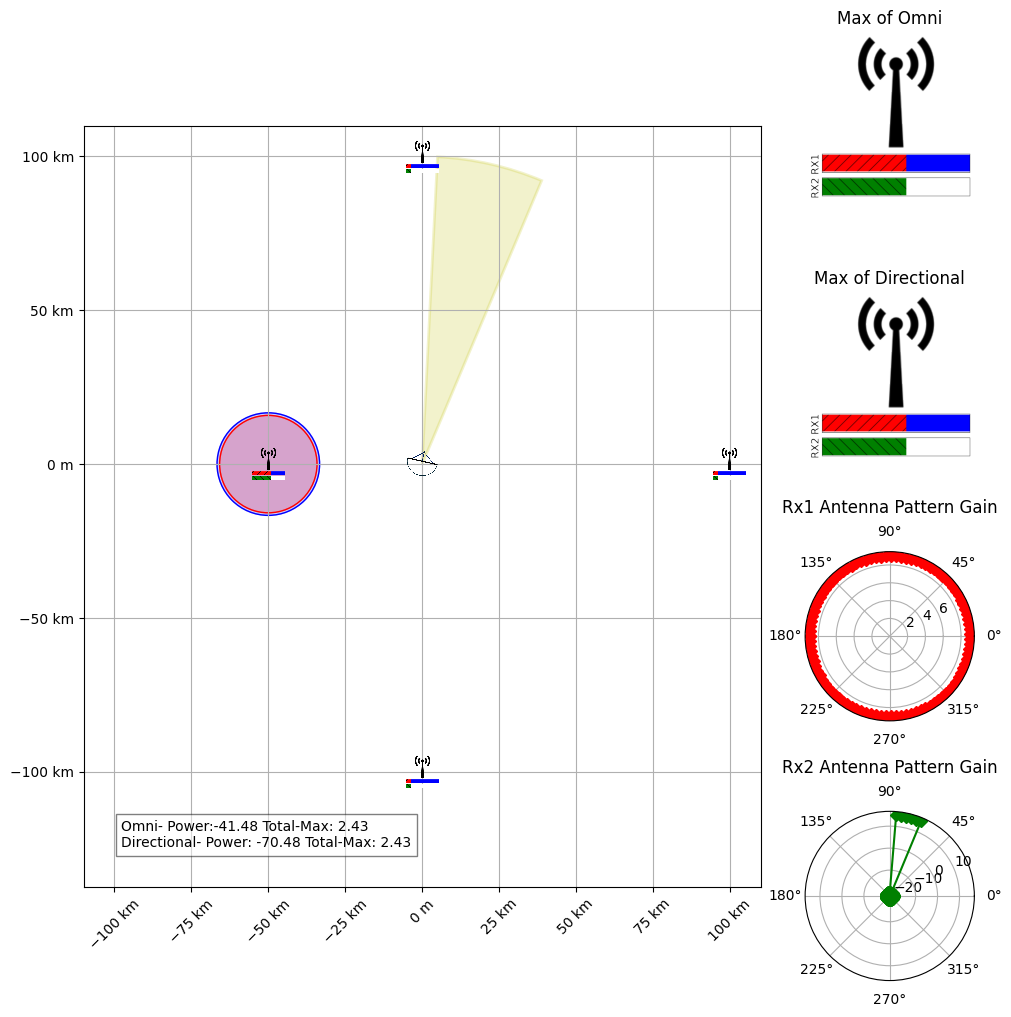

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.12993792..1.1393538].


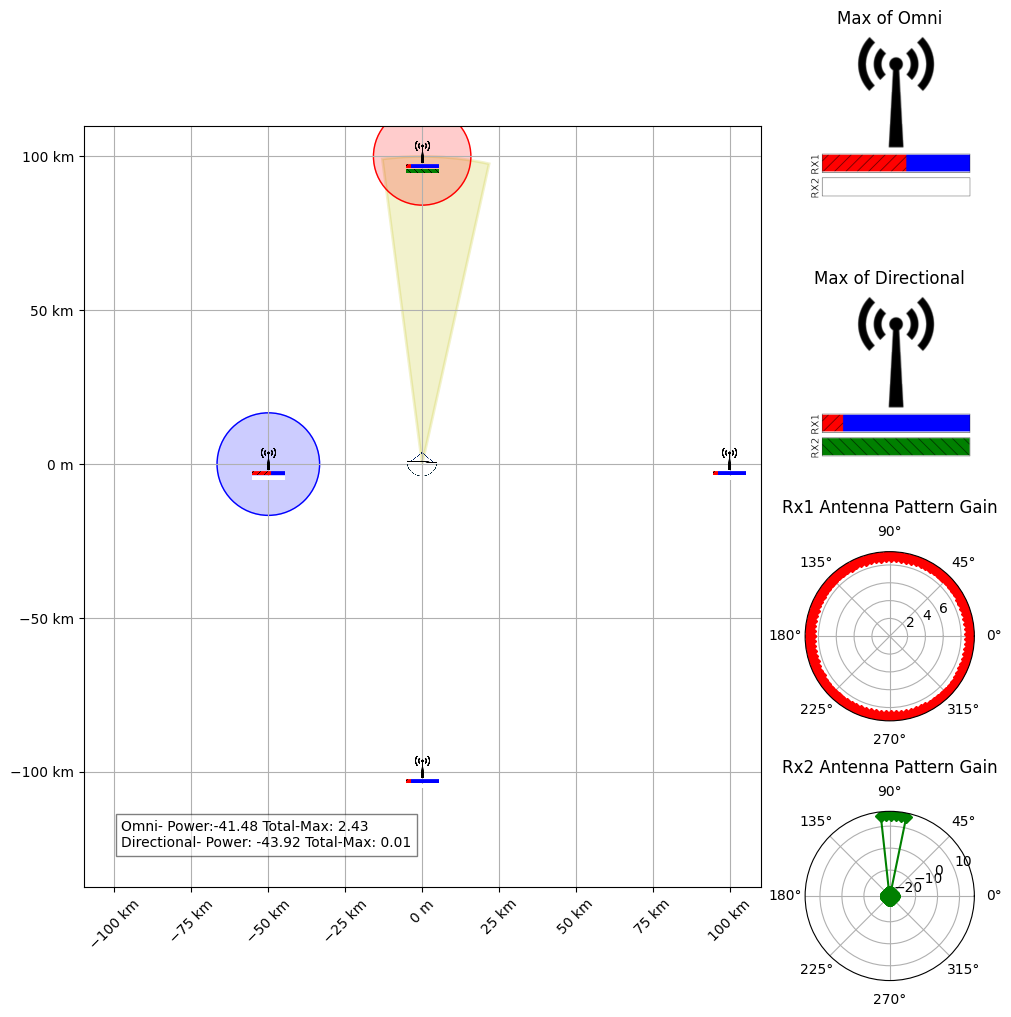

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15668437..1.1299038].


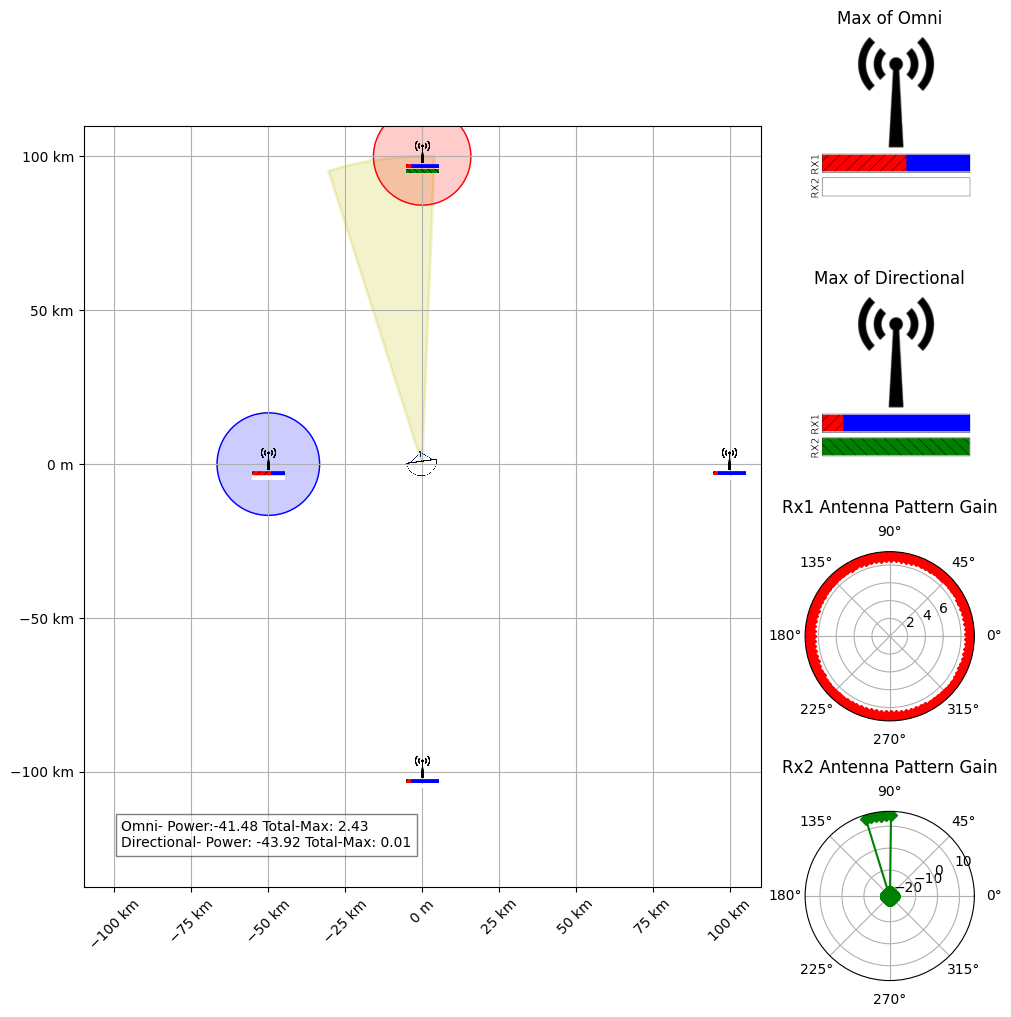

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13252096..1.1306101].


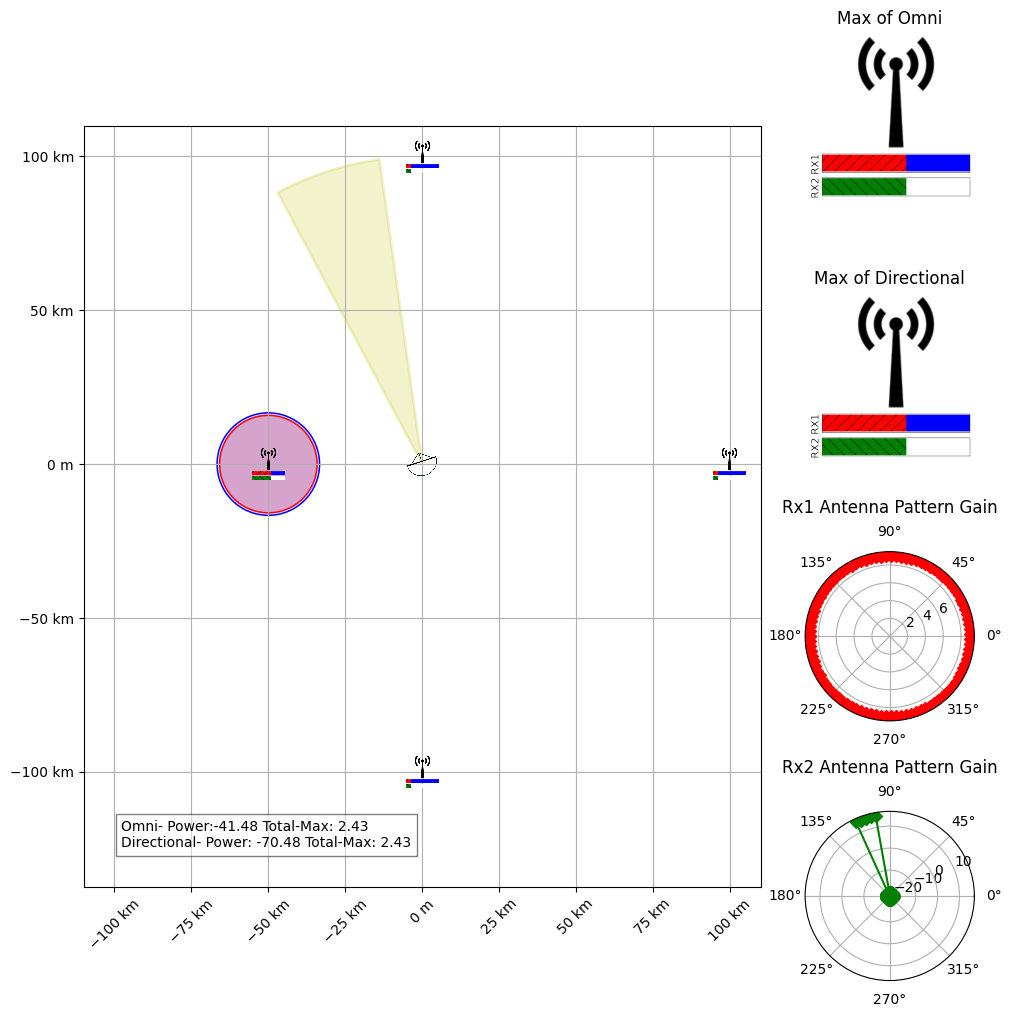

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13456973..1.129833].


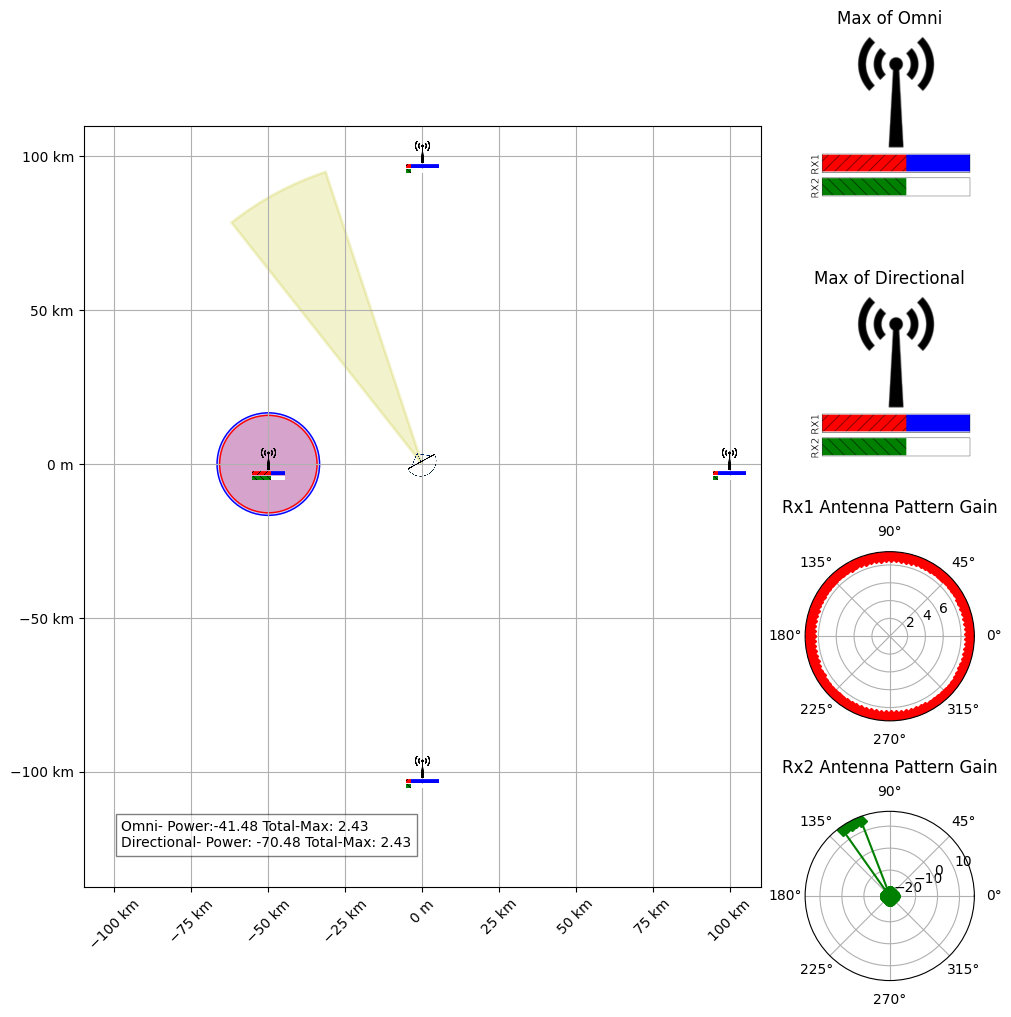

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1502932..1.1507814].


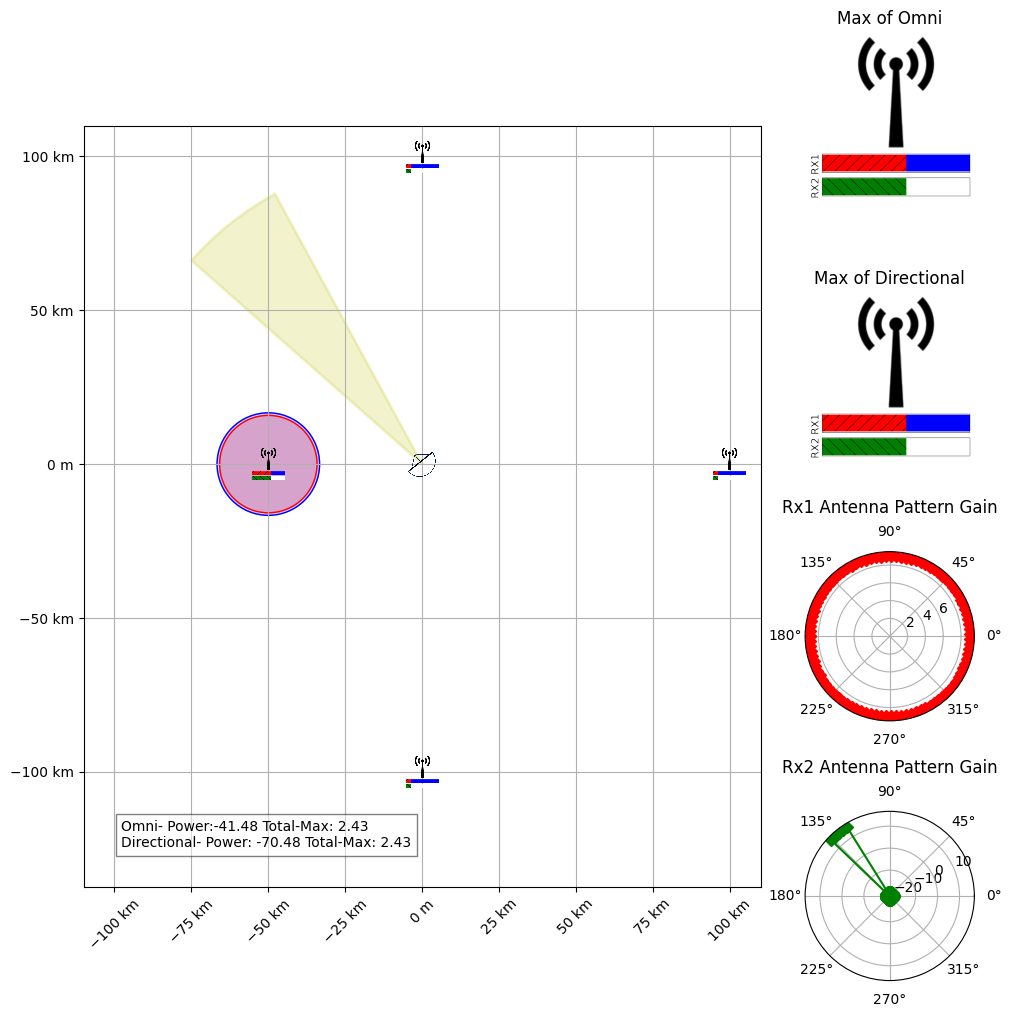

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1496682..1.1257522].


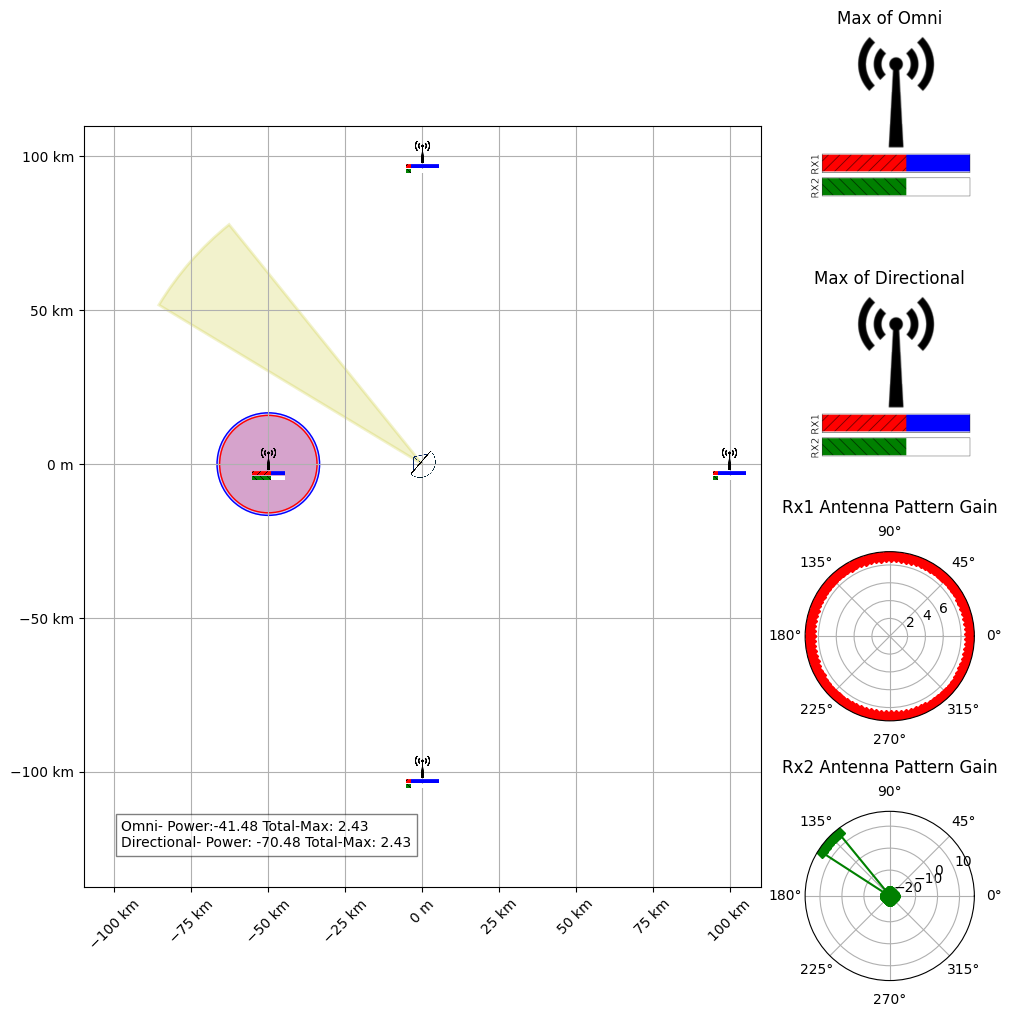

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15091021..1.1317444].


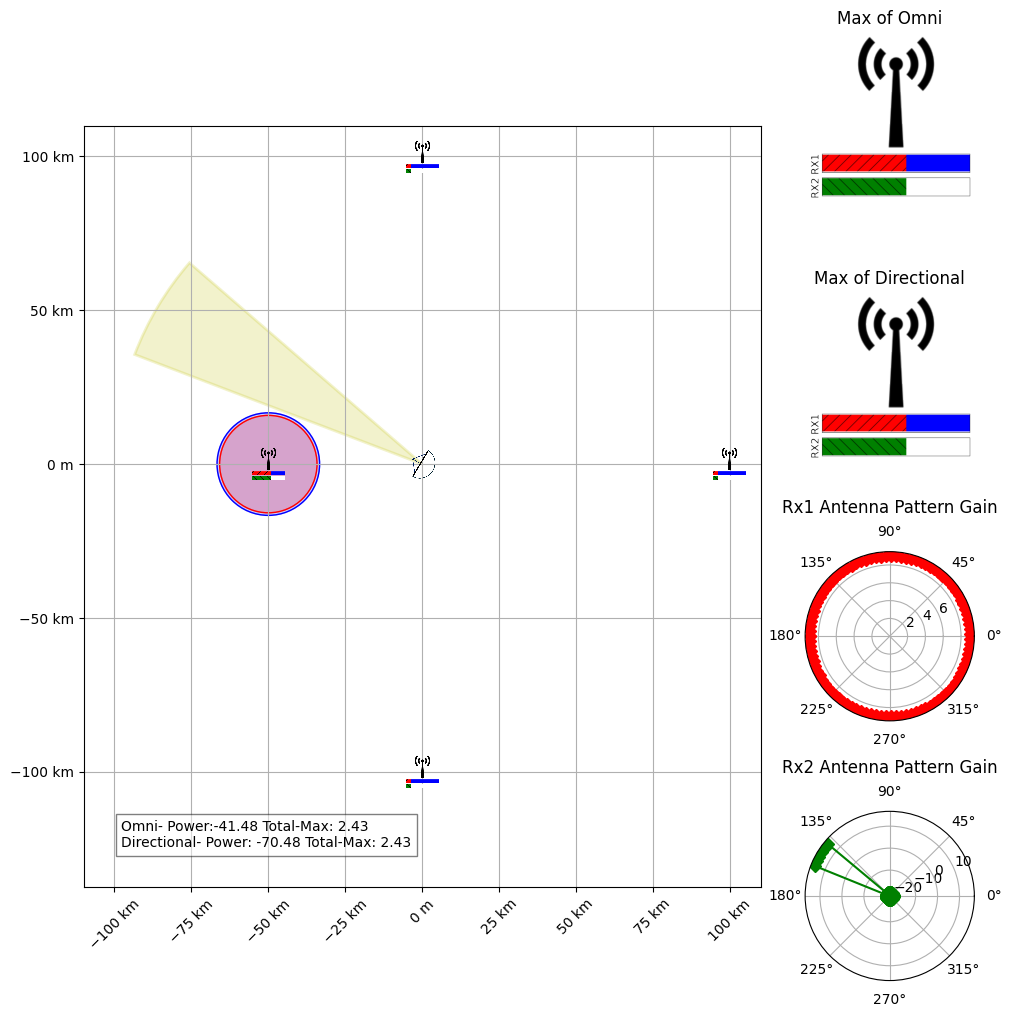

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13905919..1.1488736].


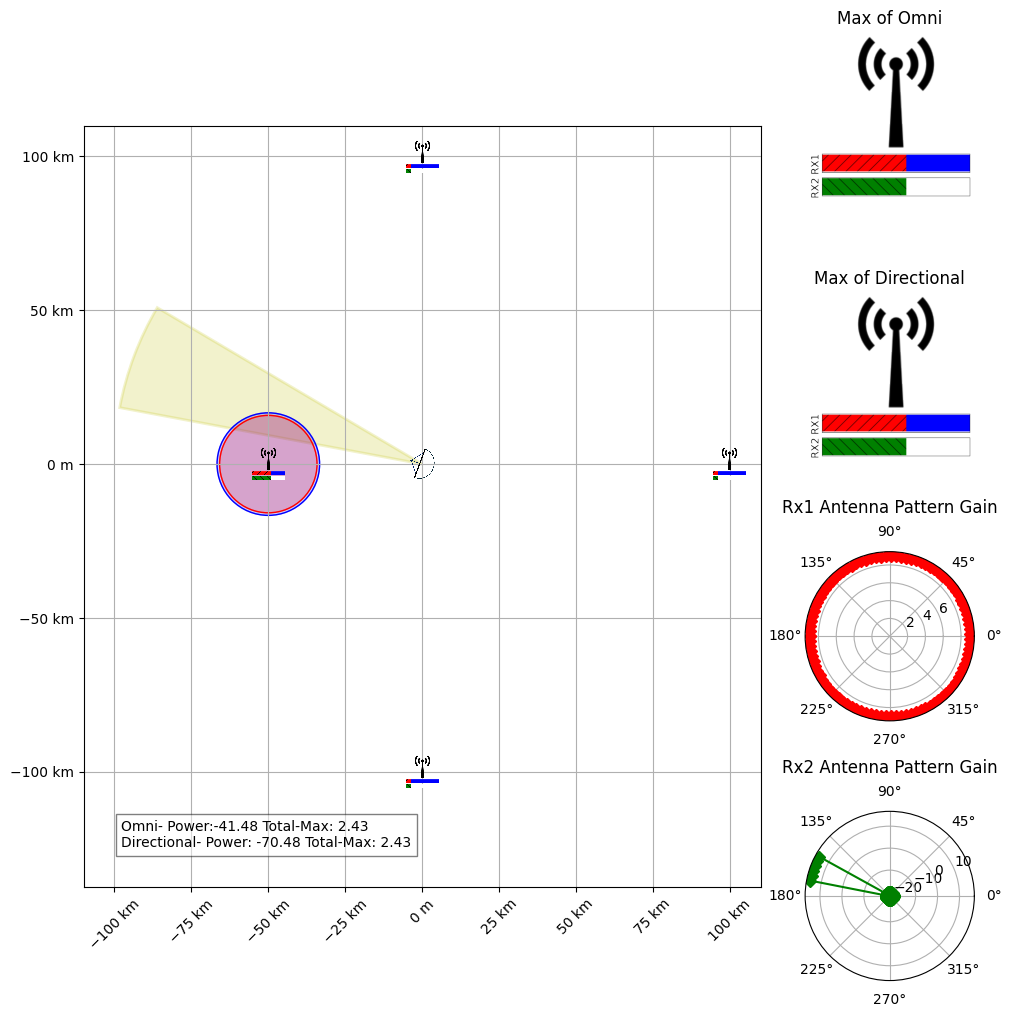

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15598106..1.1301526].


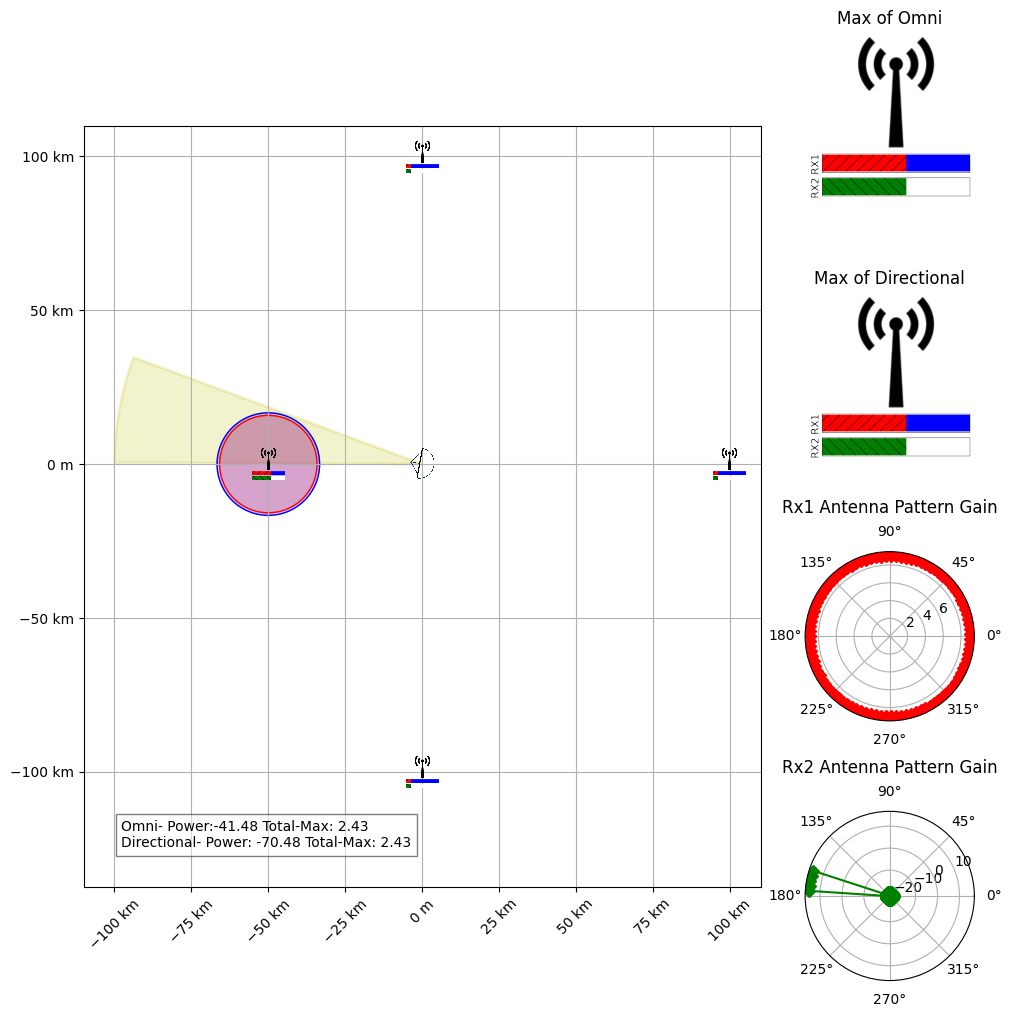

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9.514622e-17..1.0].


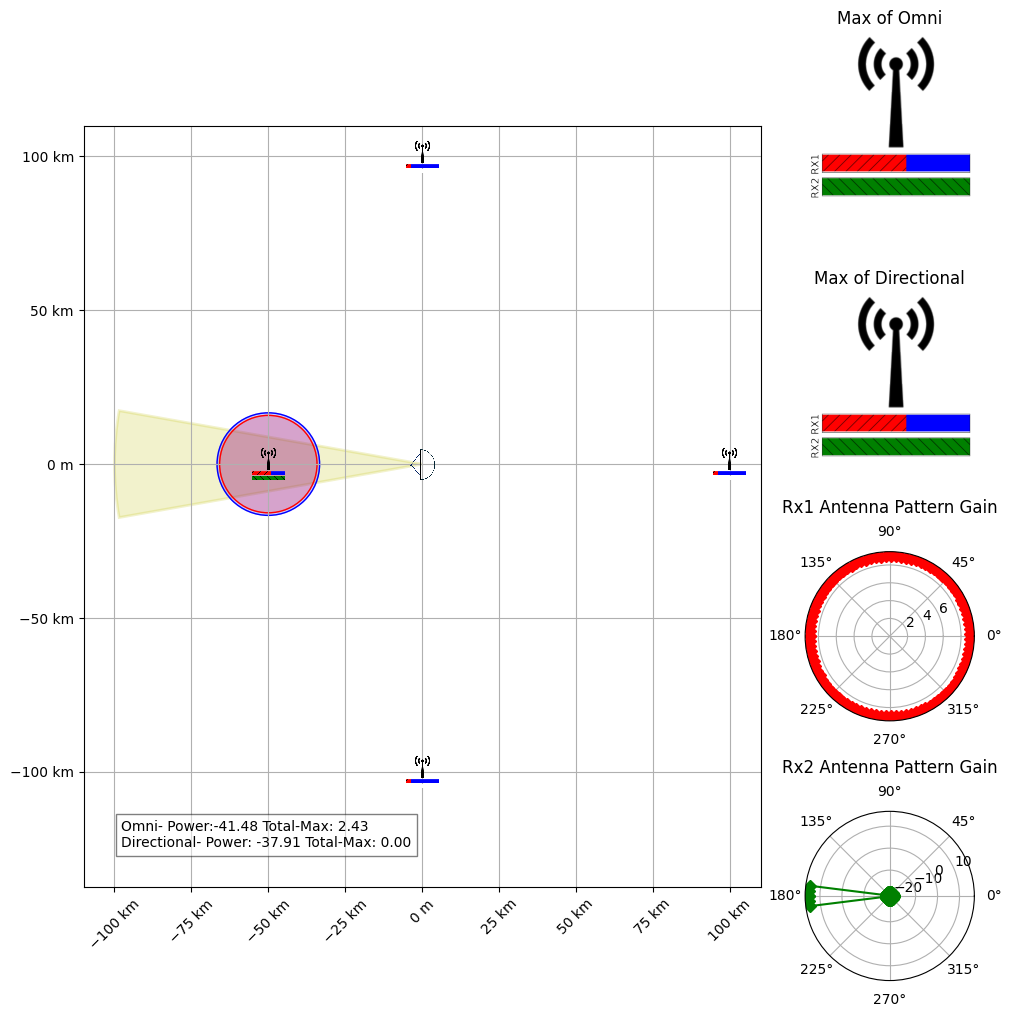

In [22]:
create_scenario_4()

c:\Users\sandersa\.conda\envs\los_simulation\Lib\site-packages\los_simulation\simulations.py:48: RuntimeWarning: invalid value encountered in power
  return gain+10*np.log10(np.cos(theta_array)**(3/2))


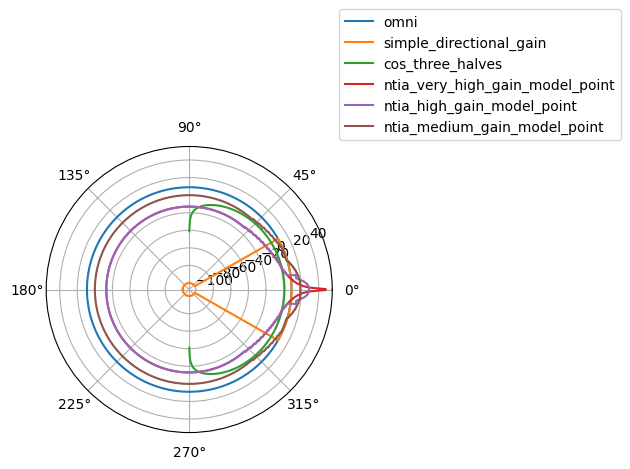

In [26]:
plot_antenna_functions()

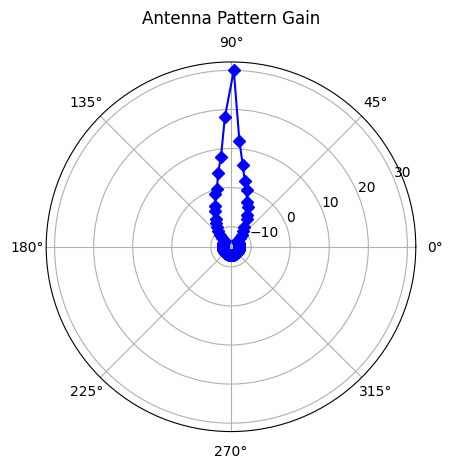

In [27]:
test_antenna_function()